<a href="https://colab.research.google.com/github/pacomm5/PLANTILLAS2/blob/main/COHORT3_MIO4_TODOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# EN ESTE EJERCICIO VOY A INTENTAR HACER TODO EN PYTHON.
# TRABAJO CON EL ARCHIVO U239_IMPORTADO QUE TENGO EN LA CARPETA DE MACHINE LEARNING. ESTA IMPORTADO DEL U239 ORIGINAL QUE TENGO EN MAESTRO

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# for data manipulation and analysis
import pandas as pd
import numpy as np

# for plotting
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
sns.set_style('darkgrid')

# Silhouette analysis
from sklearn.metrics import silhouette_score

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# for scaling
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [3]:


xlsx = pd.ExcelFile("/content/drive/MyDrive/Colab Notebooks/U239_IMPORTADO.xlsx") # ESTE EL NOMBRE DE LA RUTA. 
df = pd.read_excel(xlsx, "U239_IMPORTADO" ) # ESTE EL NOMBRE DE LA PESTAÑA. 
# he descargado el archivo en google drive para no tener que estar cargarlo cada vez que lo utilice. 


In [4]:
pd.options.display.max_columns = 0 # con esto n olimitamos que se vean todas las columnas a lo ancho

In [5]:
df.head()

,Tall,Referencia,Fecha Fa,Fec.aper,Cta.car,Nombre cliente,Cta.tit,Nombre titular,Recamb.,RECAMBIOS PVP,Tiem.fac,Total.MO,Modelo,Recep,Matricula,Bastidor,Tipo O.R.,OR UNICA,MES,AÑO,ESTANCIA,ORDEN CORTA
0,6,7655783,2015-01-02,2014-11-11,116,ORDENES DE REPARACION G,130187,GARCIA VILLAYZAN JOSE E,846.25,2336.55,11.13,788.47,A4 2.0 DIE,56,5249DJV,WAUZZZ8E65A483946,4A GARANTIA MECAN AUDI,NaN,1,2015,52,765578
1,6,7655784,2015-01-02,2014-11-11,610662,GASTOS ASUMIDOS POR TAL,130187,GARCIA VILLAYZAN JOSE E,16.38,32.76,0.00,0.00,A4 2.0 DIE,56,5249DJV,WAUZZZ8E65A483946,6A O.R. INTER MEC.AUDI,NaN,1,2015,52,765578
2,6,7655785,2015-01-02,2014-11-11,610662,GASTOS ASUMIDOS POR TAL,130187,GARCIA VILLAYZAN JOSE E,644.11,2134.41,6.77,324.90,A4 2.0 DIE,56,5249DJV,WAUZZZ8E65A483946,DG DEFER.GARANTIA AUDI,NaN,1,2015,52,765578
3,1,7683941,2015-01-02,2014-11-24,99234,SALVADOR DEL OLMO GERMA,99234,SALVADOR DEL OLMO GERMA,1675.97,3351.94,1.10,84.70,A-4 2.0 TD,272,8087DGN,WAUZZZ8E85A473547,2A O.R.CLIENT MEC AUDI,NaN,1,2015,39,768394
4,2,7702661,2015-01-02,2014-12-30,71917,RODRIGUEZ RICO MARIA CA,71917,RODRIGUEZ RICO MARIA CA,50.04,116.40,2.10,147.41,POLO 1.4 8,50,8194FBX,WVWZZZ9NZ7Y003242,2V O.R.CLIENT MEC VW,NaN,1,2015,3,770266


In [6]:
df.columns

Index(['Tall', 'Referencia', 'Fecha Fa', 'Fec.aper', 'Cta.car',
       'Nombre cliente', 'Cta.tit', 'Nombre titular', 'Recamb.',
       'RECAMBIOS PVP', 'Tiem.fac', 'Total.MO', 'Modelo', 'Recep', 'Matricula',
       'Bastidor', 'Tipo O.R.', 'OR UNICA', 'MES', 'AÑO', 'ESTANCIA',
       'ORDEN CORTA'],
      dtype='object')

In [7]:
# voy a cambiar el nombre de algunas columnas. 
df = df.rename(columns={"Fecha Fa":"Fecha_Fact", "Fec.aper":"Fecha_Apertura", "Cta.car":"Cta_Cargo","Nombre cliente":"Nombre_Cliente", "Cta.tit":"Cta_Titular", "Nombre titular":"Nombre_Titular", 
                   "Recamb.":"Recamb", "RECAMBIOS PVP":"Recamb_Pvp", "Tiem.fac":"Tiemp_Fact", "Total.MO":"Total_Mo", "Tipo O.R.":"Tipo_Or", "OR UNICA": "Or_Unica", "ORDEN CORTA":"Orden_Corta" })


In [8]:
df.columns

Index(['Tall', 'Referencia', 'Fecha_Fact', 'Fecha_Apertura', 'Cta_Cargo',
       'Nombre_Cliente', 'Cta_Titular', 'Nombre_Titular', 'Recamb',
       'Recamb_Pvp', 'Tiemp_Fact', 'Total_Mo', 'Modelo', 'Recep', 'Matricula',
       'Bastidor', 'Tipo_Or', 'Or_Unica', 'MES', 'AÑO', 'ESTANCIA',
       'Orden_Corta'],
      dtype='object')

In [9]:
print("la fecha va desde {} a {}".format(df.Fecha_Apertura.min(), df.Fecha_Apertura.max()))

la fecha va desde 2004-04-11 00:00:00 a 2023-01-31 00:00:00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311361 entries, 0 to 311360
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Tall            311361 non-null  int64         
 1   Referencia      311361 non-null  int64         
 2   Fecha_Fact      295058 non-null  datetime64[ns]
 3   Fecha_Apertura  311361 non-null  datetime64[ns]
 4   Cta_Cargo       307121 non-null  object        
 5   Nombre_Cliente  311360 non-null  object        
 6   Cta_Titular     311327 non-null  object        
 7   Nombre_Titular  311326 non-null  object        
 8   Recamb          311361 non-null  float64       
 9   Recamb_Pvp      311361 non-null  float64       
 10  Tiemp_Fact      311355 non-null  float64       
 11  Total_Mo        311355 non-null  float64       
 12  Modelo          309941 non-null  object        
 13  Recep           311361 non-null  object        
 14  Matricula       311361 non-null  obj

In [ ]:
"""# voy a filtrar por fecha
df = df[(df["Fecha_Apertura"]>="2015-01-01") & (df["Fecha_Apertura"]<="2022-06-30")] # CAMBIO LA FECHA Y METO ESTE AÑO.""" 

'# voy a filtrar por fecha\ndf = df[(df["Fecha_Apertura"]>="2015-01-01") & (df["Fecha_Apertura"]<="2022-06-30")] # CAMBIO LA FECHA Y METO ESTE AÑO.'

In [11]:
print("la fecha va desde {} a {}".format(df.Fecha_Apertura.min(), df.Fecha_Apertura.max()))

la fecha va desde 2004-04-11 00:00:00 a 2023-01-31 00:00:00


In [12]:
df.columns

Index(['Tall', 'Referencia', 'Fecha_Fact', 'Fecha_Apertura', 'Cta_Cargo',
       'Nombre_Cliente', 'Cta_Titular', 'Nombre_Titular', 'Recamb',
       'Recamb_Pvp', 'Tiemp_Fact', 'Total_Mo', 'Modelo', 'Recep', 'Matricula',
       'Bastidor', 'Tipo_Or', 'Or_Unica', 'MES', 'AÑO', 'ESTANCIA',
       'Orden_Corta'],
      dtype='object')

In [13]:
# lo primero que voy a hacer es cambiar de tipo de datos. 
df["Tall"] = df["Tall"].apply(str)
df["Referencia"] = df["Referencia"].apply(str)
df["Cta_Cargo"] = df["Cta_Cargo"].apply(str)
df["Or_Unica"] = df["Or_Unica"].apply(str)
df["Orden_Corta"] = df["Orden_Corta"].apply(str)
df["Cta_Cargo"] = df["Cta_Cargo"].apply(str)
df["Nombre_Cliente"] = df["Nombre_Cliente"].apply(str)
df["Cta_Titular"] = df["Cta_Titular"].apply(str)
df["Nombre_Titular"] = df["Nombre_Titular"].apply(str)
df["Modelo"] = df["Modelo"].apply(str)
df["Recep"] = df["Recep"].apply(str)
df["Matricula"] = df["Matricula"].apply(str)
df["Bastidor"] = df["Bastidor"].apply(str)
df["Tipo_Or"] = df["Tipo_Or"].apply(str)


In [14]:
print("la fecha va desde {} a {}".format(df.Fecha_Apertura.min(), df.Fecha_Apertura.max()))

la fecha va desde 2004-04-11 00:00:00 a 2023-01-31 00:00:00


In [15]:
df["Fact_total"] = df["Total_Mo"] + df["Recamb"]

In [16]:
# de esta manera lo que hago es quitar el último digito de la variable referencia. 
# lo he hecho para probar como se hace. podría haberlo metido en otra variable y luego meterla en el dataframe para no eliminar información. 
df["Orden_Corta2"] = df.apply(lambda x: x["Referencia"][:-1], axis=1)

In [17]:
# voy a quitar las internas. 
df = df[df["Tipo_Or"].str.startswith("5")!=True]
# voy a quitar las internas. 
df = df[df["Tipo_Or"].str.startswith("6")!=True]

In [18]:
df.Tipo_Or.value_counts(normalize=True) # por numero de lineas, debajo están los pesos. 

2A O.R.CLIENT MEC AUDI       0.226152
2V O.R.CLIENT MEC VW         0.159613
7A PRESUPUESTO CH AUDI       0.133371
4A GARANTIA MECAN AUDI       0.112001
7V PRESUPUESTO CH VW         0.088466
4V GARANTIA MECAN VW         0.073606
2A O.R.CLIENT MEC AUDI-CO    0.053424
11LV O.R. MEC VW LONG DRI    0.041052
11LA O.R. MEC AU LONG DRI    0.033647
2V O.R.CLIENT MEC VW-CONT    0.033498
7LA PRES  AU CH  LONG DRI    0.006106
2RA O.R.CLIENT MEC AUDI -    0.005091
1A O.R.CLIENT CH AUDI        0.004893
12LA O.R. MEC AU VW RENTI    0.003845
7LV PRES  VW CH  LONG DRI    0.003205
2RV O.R.CLIENT MEC VW-CRE    0.003131
2L O.R.CLIENT MEC LCV        0.002941
DG DEFER.GARANTIA AUDI       0.002933
4L GARANTIA MECAN LCV        0.002327
1V O.R.CLIENT CH VW          0.002021
GD DEFER.GARANTIA MECAN V    0.002021
12LV O.R. MEC VW VW RENTI    0.001943
2L O.R.CLIENT MEC LCV-CON    0.001551
11LL O.R. MEC LCV LONG DR    0.001052
7L PRESUPUESTO CH LCV        0.001031
2RL O.R.CLIENT MEC LCV-CR    0.000318
12LL O.R. ME

In [19]:
df.head()

,Tall,Referencia,Fecha_Fact,Fecha_Apertura,Cta_Cargo,Nombre_Cliente,Cta_Titular,Nombre_Titular,Recamb,Recamb_Pvp,Tiemp_Fact,Total_Mo,Modelo,Recep,Matricula,Bastidor,Tipo_Or,Or_Unica,MES,AÑO,ESTANCIA,Orden_Corta,Fact_total,Orden_Corta2
0,6,7655783,2015-01-02,2014-11-11,116,ORDENES DE REPARACION G,130187,GARCIA VILLAYZAN JOSE E,846.25,2336.55,11.13,788.47,A4 2.0 DIE,56,5249DJV,WAUZZZ8E65A483946,4A GARANTIA MECAN AUDI,nan,1,2015,52,765578,1634.72,765578
2,6,7655785,2015-01-02,2014-11-11,610662,GASTOS ASUMIDOS POR TAL,130187,GARCIA VILLAYZAN JOSE E,644.11,2134.41,6.77,324.90,A4 2.0 DIE,56,5249DJV,WAUZZZ8E65A483946,DG DEFER.GARANTIA AUDI,nan,1,2015,52,765578,969.01,765578
3,1,7683941,2015-01-02,2014-11-24,99234,SALVADOR DEL OLMO GERMA,99234,SALVADOR DEL OLMO GERMA,1675.97,3351.94,1.10,84.70,A-4 2.0 TD,272,8087DGN,WAUZZZ8E85A473547,2A O.R.CLIENT MEC AUDI,nan,1,2015,39,768394,1760.67,768394
4,2,7702661,2015-01-02,2014-12-30,71917,RODRIGUEZ RICO MARIA CA,71917,RODRIGUEZ RICO MARIA CA,50.04,116.40,2.10,147.41,POLO 1.4 8,50,8194FBX,WVWZZZ9NZ7Y003242,2V O.R.CLIENT MEC VW,nan,1,2015,3,770266,197.45,770266
5,1,7716492,2015-01-02,2014-12-11,116,ORDENES DE REPARACION G,117453,LOPEZ NAVARRO JOSE ANTO,0.00,0.00,0.37,26.20,A4 2.0TDI,272,5848HKH,WAUZZZ8K3DA012518,4A GARANTIA MECAN AUDI,nan,1,2015,22,771649,26.20,771649


In [20]:
df.shape

(242399, 24)

In [21]:
df.isnull().sum() # como podemos veer debajo tenemos 13.698 filas sin fecha de facturación. estas las voy a quitar. Lo haremos mas adelante. 

Tall                  0
Referencia            0
Fecha_Fact        10257
Fecha_Apertura        0
Cta_Cargo             0
Nombre_Cliente        0
Cta_Titular           0
Nombre_Titular        0
Recamb                0
Recamb_Pvp            0
Tiemp_Fact            6
Total_Mo              6
Modelo                0
Recep                 0
Matricula             0
Bastidor              0
Tipo_Or               0
Or_Unica              0
MES                   0
AÑO                   0
ESTANCIA              0
Orden_Corta           0
Fact_total            6
Orden_Corta2          0
dtype: int64

In [ ]:
df.Orden_Corta2.nunique() # este es número total de ordenes cortas, por lo tanto de pasos. 

164877

In [ ]:
df.Bastidor.nunique() # tenemos 58.809 vehículos bastidores diferentes. 

52172

In [ ]:
df.Fact_total.describe() # aquí tenemos los estadísticos de facturación total. vemos valores negativos que serán los abonos. 

count    239762.000000
mean        399.808371
std         933.348176
min      -32419.720000
25%          67.670000
50%         244.370000
75%         484.835000
max       32419.720000
Name: Fact_total, dtype: float64

In [22]:
df = df[df["Fact_total"]>=0] # quitamos todas las ordenes que sean negativas. 
df.shape

(237941, 24)

In [23]:
print("la fecha va desde {} a {}".format(df.Fecha_Apertura.min(), df.Fecha_Apertura.max()))

la fecha va desde 2004-04-11 00:00:00 a 2023-01-31 00:00:00


In [24]:
df.Fact_total.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    237941.000000
mean        434.177077
std         832.310310
min           0.000000
25%          80.550000
50%         250.800000
75%         490.910000
90%         908.740000
95%        1375.480000
99%        3356.500000
max       32419.720000
Name: Fact_total, dtype: float64

In [ ]:
df.Bastidor.nunique() # por ahora después de la limpieza tenemos 58.798 clientes o bastidores. 

52159

In [ ]:
df.Tipo_Or.nunique() # tenemos 39 tipos de ordenes. 

34

In [ ]:
df.Bastidor.nunique() # después de haber quitado el interno tenemos 58.714 bastidores. 

52159

In [ ]:
df.shape # tenemos 274.898 filas

(235393, 24)

In [ ]:
df.isnull().sum()

Tall                  0
Referencia            0
Fecha_Fact        10101
Fecha_Apertura        0
Cta_Cargo             0
Nombre_Cliente        0
Cta_Titular           0
Nombre_Titular        0
Recamb                0
Recamb_Pvp            0
Tiemp_Fact            5
Total_Mo              0
Modelo                0
Recep                 0
Matricula             0
Bastidor              0
Tipo_Or               0
Or_Unica              0
MES                   0
AÑO                   0
ESTANCIA              0
Orden_Corta           0
Fact_total            0
Orden_Corta2          0
dtype: int64

In [25]:
# vamos a quitar todas las filas que no tengan numero de bastidor.
df = df[~df.Bastidor.isnull()]
df.shape

(237941, 24)

In [26]:
# también vamos a quitar todos los que no tienen fecha de facturación. 
df = df[~df.Fecha_Fact.isnull()]
# Tambien quito los que no tengan nombre del titular. 
df = df[~df.Nombre_Titular.isnull()]
df = df[~df.Cta_Titular.isnull()]
df = df[~df.Modelo.isnull()]

In [ ]:
df.Bastidor.nunique() #58058 bastidores. 

51746

In [ ]:
df.Orden_Corta2.nunique()

162079

In [ ]:
df.shape

(225292, 24)

In [ ]:
df.info() # aqui he quitado todos los nulos. podría haberlos sustituido por otra cosa.....

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225292 entries, 0 to 307978
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Tall            225292 non-null  object        
 1   Referencia      225292 non-null  object        
 2   Fecha_Fact      225292 non-null  datetime64[ns]
 3   Fecha_Apertura  225292 non-null  datetime64[ns]
 4   Cta_Cargo       225292 non-null  object        
 5   Nombre_Cliente  225292 non-null  object        
 6   Cta_Titular     225292 non-null  object        
 7   Nombre_Titular  225292 non-null  object        
 8   Recamb          225292 non-null  float64       
 9   Recamb_Pvp      225292 non-null  float64       
 10  Tiemp_Fact      225287 non-null  float64       
 11  Total_Mo        225292 non-null  float64       
 12  Modelo          225292 non-null  object        
 13  Recep           225292 non-null  object        
 14  Matricula       225292 non-null  obj

In [ ]:
df.isnull().sum()

Tall              0
Referencia        0
Fecha_Fact        0
Fecha_Apertura    0
Cta_Cargo         0
Nombre_Cliente    0
Cta_Titular       0
Nombre_Titular    0
Recamb            0
Recamb_Pvp        0
Tiemp_Fact        5
Total_Mo          0
Modelo            0
Recep             0
Matricula         0
Bastidor          0
Tipo_Or           0
Or_Unica          0
MES               0
AÑO               0
ESTANCIA          0
Orden_Corta       0
Fact_total        0
Orden_Corta2      0
dtype: int64

In [27]:
# creating some columns for exploratory


df['year'] = df['Fecha_Apertura'].dt.year # sacamos el año de la fecha
df['month'] = df['Fecha_Apertura'].dt.month # sacamos el mes
df['day'] = df['Fecha_Apertura'].dt.day # sacamos el día. 
df['day_of_week'] = df['Fecha_Apertura'].dt.dayofweek # sacamos el día de la semana. 

In [28]:
df.head(2)

,Tall,Referencia,Fecha_Fact,Fecha_Apertura,Cta_Cargo,Nombre_Cliente,Cta_Titular,Nombre_Titular,Recamb,Recamb_Pvp,Tiemp_Fact,Total_Mo,Modelo,Recep,Matricula,Bastidor,Tipo_Or,Or_Unica,MES,AÑO,ESTANCIA,Orden_Corta,Fact_total,Orden_Corta2,year,month,day,day_of_week
0,6,7655783,2015-01-02,2014-11-11,116,ORDENES DE REPARACION G,130187,GARCIA VILLAYZAN JOSE E,846.25,2336.55,11.13,788.47,A4 2.0 DIE,56,5249DJV,WAUZZZ8E65A483946,4A GARANTIA MECAN AUDI,nan,1,2015,52,765578,1634.72,765578,2014,11,11,1
2,6,7655785,2015-01-02,2014-11-11,610662,GASTOS ASUMIDOS POR TAL,130187,GARCIA VILLAYZAN JOSE E,644.11,2134.41,6.77,324.90,A4 2.0 DIE,56,5249DJV,WAUZZZ8E65A483946,DG DEFER.GARANTIA AUDI,nan,1,2015,52,765578,969.01,765578,2014,11,11,1


In [29]:
df = df[(df["Fecha_Apertura"]>="2015-01-01") & (df["Fecha_Apertura"]<="2023-01-31")]

In [30]:
print("la fecha va desde {} a {}".format(df.Fecha_Apertura.min(), df.Fecha_Apertura.max()))

la fecha va desde 2015-01-02 00:00:00 a 2023-01-31 00:00:00


# AQUI YA METO TODOS

In [31]:
df_todos = df.copy()

In [ ]:
"""df_audi = df_audi[df_audi["Tall"]== "1", "3", "6"]
reqd_stocks = stocks_df[(stocks_df.Sector == "Technology") & (stocks_df.Price <500)]
df_audi = df_audi[(df_audi.Tall== "1")  (df_audi.Tall== "6") or (df_audi.Tall== "3")]
df_audi = df_audi["Tall"].isin(["1", "3", "6"])"""
"""df_audi = df_audi.loc[(df['Tall'] == '1') | (df_audi['Tall'] == '3') | (df_audi['Tall'] == '6') ]"""

In [32]:
df_todos.head()

,Tall,Referencia,Fecha_Fact,Fecha_Apertura,Cta_Cargo,Nombre_Cliente,Cta_Titular,Nombre_Titular,Recamb,Recamb_Pvp,Tiemp_Fact,Total_Mo,Modelo,Recep,Matricula,Bastidor,Tipo_Or,Or_Unica,MES,AÑO,ESTANCIA,Orden_Corta,Fact_total,Orden_Corta2,year,month,day,day_of_week
7,2,7718451,2015-01-02,2015-01-02,112631,SANCHEZ GALLEGO MARTIN,112631,SANCHEZ GALLEGO MARTIN,81.30,189.70,1.00,54.74,POLO ADVAN,9,1380HNZ,WVWZZZ6RZDY146213,2V O.R.CLIENT MEC VW,nan,1,2015,0,771845,136.04,771845,2015,1,2,4
9,3,7731371,2015-01-02,2015-01-02,129792,MUÑOZ MUÑOZ ANGEL,129792,MUÑOZ MUÑOZ ANGEL,242.54,485.08,0.75,38.00,AUDI A4 AV,63,8066HBC,WAUZZZ8K3BA088978,2A O.R.CLIENT MEC AUDI,nan,1,2015,0,773137,280.54,773137,2015,1,2,4
24,2,7741801,2015-01-02,2015-01-02,97987,MIRA GOMEZ PALOMA,97987,MIRA GOMEZ PALOMA,197.25,429.30,1.60,116.80,TOURAN EDI,9,4533GKB,WVGZZZ1TZ9W031579,2V O.R.CLIENT MEC VW,nan,1,2015,0,774180,314.05,774180,2015,1,2,4
35,3,7747151,2015-01-02,2015-01-02,99476,SANCHEZ FAUQUIER MARIA,99476,SANCHEZ FAUQUIER MARIA,214.89,429.78,2.40,189.51,AUDI A3 SB,63,0511GMX,WAUZZZ8P79A151117,2A O.R.CLIENT MEC AUDI,nan,1,2015,0,774715,404.40,774715,2015,1,2,4
37,3,7747441,2015-01-02,2015-01-02,73994,MORENO CANELO REGINA,73994,MORENO CANELO REGINA,231.09,462.18,2.40,189.46,A-3 2.0TDI,63,1076DRZ,WAUZZZ8P36B002015,2A O.R.CLIENT MEC AUDI,nan,1,2015,0,774744,420.55,774744,2015,1,2,4


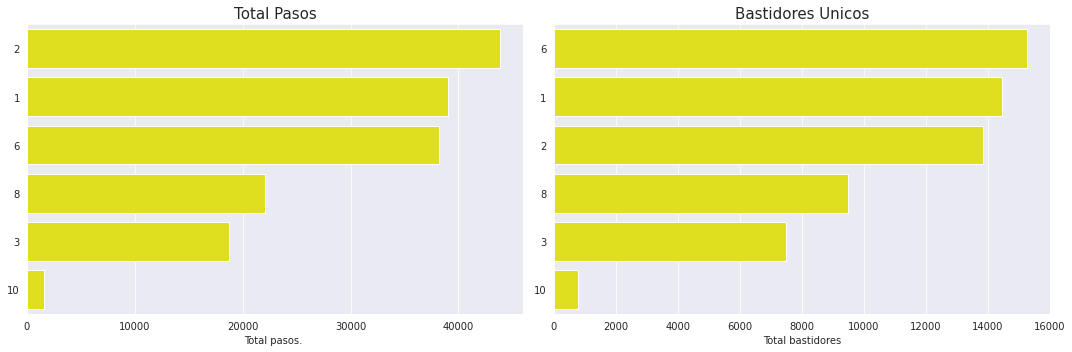

In [33]:
# voy a sacar unos graficos. 

column = ["Orden_Corta2", "Bastidor"]
plt.figure(figsize=(15,5))
for i, j in enumerate(column):
    plt.subplot(1,2, i+1)
    sns.barplot(x = df_todos.groupby("Tall")[j].nunique().sort_values(ascending=False).head(10).values,
                y = df_todos.groupby("Tall")[j].nunique().sort_values(ascending=False).head(10).index,
                color = "yellow")
    plt.ylabel("")
    if i == 0:
        plt.xlabel("Total pasos. ")
        plt.title("Total Pasos", size=15)
    else:
        plt.xlabel("Total bastidores")
        plt.title("Bastidores Unicos", size=15)

plt.tight_layout()
plt.show()

In [ ]:
df_todos.groupby("Tall")["Bastidor"].nunique().sort_values(ascending=False) # aqui estoy sacando los valores de arriba. 

Tall
6     15139
1     14359
2     13739
8      9384
3      7422
10      764
Name: Bastidor, dtype: int64

In [ ]:
df_todos.groupby("Tall")["Orden_Corta2"].nunique().sort_values(ascending=False) # aqui estoy sacando los valores de arriba. 

Tall
2     43372
1     38637
6     37816
8     21787
3     18528
10     1544
Name: Orden_Corta2, dtype: int64

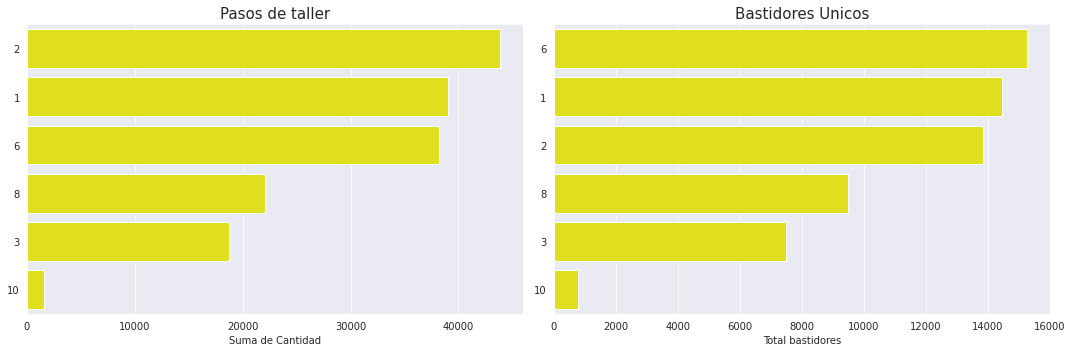

In [34]:
# voy a sacar unos graficos. 

column = ["Orden_Corta2", "Bastidor"]
plt.figure(figsize=(15,5))
for i, j in enumerate(column):
    plt.subplot(1,2, i+1)
    sns.barplot(x = df_todos.groupby("Tall")[j].nunique().sort_values(ascending=False).head(10).values,
                y = df_todos.groupby("Tall")[j].nunique().sort_values(ascending=False).head(10).index,
                color = "yellow")
    plt.ylabel("")
    if i == 0:
        plt.xlabel("Suma de Cantidad")
        plt.title("Pasos de taller", size=15)
    else:
        plt.xlabel("Total bastidores")
        plt.title("Bastidores Unicos", size=15)

plt.tight_layout()
plt.show()

In [ ]:
df_todos.groupby("Tall")["Bastidor"].nunique().sort_values(ascending=False) # de esta manera estoy sacando el dato de bastidores unicos por taller. con sort_value los ordeno por cantidad de bastidores. 

Tall
6     15139
1     14359
2     13739
8      9384
3      7422
10      764
Name: Bastidor, dtype: int64

In [ ]:
df_todos.groupby("Tall")["Fact_total"].sum().sort_values(ascending=False) # aqui estoy agrupando por taller y facturación total. 

Tall
6     29469702.13
1     28005968.95
2     23100314.90
8     11744819.69
3      8196789.25
10      941360.77
Name: Fact_total, dtype: float64

In [ ]:
df_todos.groupby( "year")["Bastidor"].nunique().sort_values(ascending=False) # debería quitar todos los datos anteriores al 2015 y quizas el 2022

year
2019    15977
2018    15634
2017    15576
2022    15477
2021    14789
2020    14327
2016    13243
2015    12033
Name: Bastidor, dtype: int64

In [ ]:
df_todos.groupby(["Tall", "year"])["Bastidor"].nunique().sort_values(ascending=False) # de esta manera estoy sacando el dato de bastidores unicos por taller. con sort_value los ordeno por cantidad de bastidores. 
# si quiero agrupar por mas de una variable se hace así. 

Tall  year
2     2017    4377
      2015    4217
      2018    4145
      2022    4069
1     2022    3983
2     2019    3973
1     2019    3926
      2018    3921
      2017    3916
2     2016    3848
6     2019    3842
2     2021    3787
6     2020    3691
      2018    3686
      2017    3674
      2022    3603
      2021    3561
1     2021    3517
2     2020    3423
1     2020    3353
      2016    3327
6     2016    3225
1     2015    3030
6     2015    2880
8     2019    2576
      2018    2496
      2021    2462
      2022    2384
      2017    2265
      2020    2259
3     2019    2044
      2017    1961
      2018    1950
      2022    1809
      2020    1798
      2015    1779
      2016    1759
      2021    1700
8     2016    1647
      2015     723
10    2022     297
      2021     294
      2020     270
      2019     246
      2018      53
Name: Bastidor, dtype: int64

In [ ]:
df_todos.groupby(["Tall", "year"])["Bastidor"].nunique() # de esta manera estoy sacando el dato de bastidores unicos por taller. con sort_value los ordeno por cantidad de bastidores. 

Tall  year
1     2015    3030
      2016    3327
      2017    3916
      2018    3921
      2019    3926
      2020    3353
      2021    3517
      2022    3983
10    2018      53
      2019     246
      2020     270
      2021     294
      2022     297
2     2015    4217
      2016    3848
      2017    4377
      2018    4145
      2019    3973
      2020    3423
      2021    3787
      2022    4069
3     2015    1779
      2016    1759
      2017    1961
      2018    1950
      2019    2044
      2020    1798
      2021    1700
      2022    1809
6     2015    2880
      2016    3225
      2017    3674
      2018    3686
      2019    3842
      2020    3691
      2021    3561
      2022    3603
8     2015     723
      2016    1647
      2017    2265
      2018    2496
      2019    2576
      2020    2259
      2021    2462
      2022    2384
Name: Bastidor, dtype: int64

In [ ]:
df_todos.groupby(["Tall", "year"])["Orden_Corta2"].nunique() # de esta manera estoy sacando el dato de bastidores unicos por taller. con sort_value los ordeno por cantidad de bastidores. 

Tall  year
1     2015    4148
      2016    4747
      2017    5674
      2018    5284
      2019    5201
      2020    4126
      2021    4455
      2022    5002
10    2018      55
      2019     328
      2020     329
      2021     397
      2022     435
2     2015    5593
      2016    5507
      2017    6622
      2018    5776
      2019    5593
      2020    4271
      2021    4875
      2022    5135
3     2015    2324
      2016    2341
      2017    2638
      2018    2471
      2019    2552
      2020    2088
      2021    2013
      2022    2101
6     2015    3991
      2016    4683
      2017    5270
      2018    5005
      2019    5137
      2020    4562
      2021    4541
      2022    4627
8     2015     808
      2016    2284
      2017    3118
      2018    3297
      2019    3434
      2020    2742
      2021    3112
      2022    2993
Name: Orden_Corta2, dtype: int64

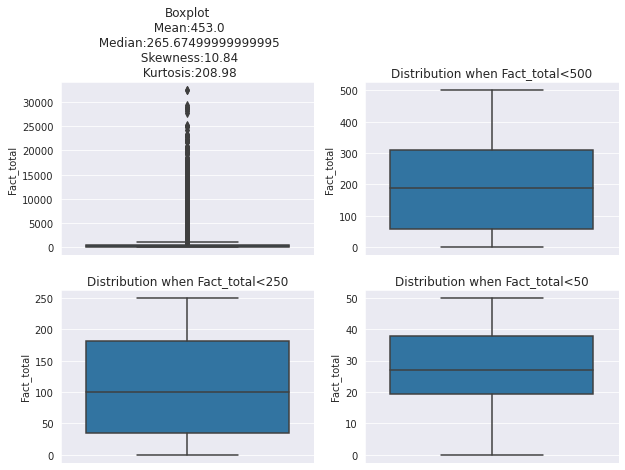

In [35]:
# Looking the distribution of column Quantity
plt.figure(figsize=(10,7)) # fijamos el tamaño del gráfico

skewness = round(df_todos.Fact_total.skew(),2) # calculamos el skewness
kurtosis = round(df_todos.Fact_total.kurtosis(),2) # calculamos la kurtosis
mean = round(np.mean(df_todos.Fact_total),0) # calculamos la media
median = np.median(df_todos.Fact_total) # calculamos la mediana. 

plt.subplot(2,2,1) # esto quieres decir un grafico de 2 x 2 y este ira en 0.0 primera fila primera columna. 
sns.boxplot(y=df_todos.Fact_total)
plt.title('Boxplot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))
# le estamos metindo una descripción

plt.subplot(2,2,2)
sns.boxplot(y=df_todos[df_todos.Fact_total<500]['Fact_total'])
plt.title('Distribution when Fact_total<500')

plt.subplot(2,2,3)
sns.boxplot(y=df_todos[df_todos.Fact_total<250]['Fact_total'])
plt.title('Distribution when Fact_total<250')

plt.subplot(2,2,4)
sns.boxplot(y=df_todos[df_todos.Fact_total<50]['Fact_total'])
plt.title('Distribution when Fact_total<50')

plt.show()

# estamos trabajando con la cantidad y la analizamos desde diferentes rangos la facturación total. 

In [36]:
df_todos.Fact_total.describe(percentiles=[0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

count    227094.000000
mean        452.741749
std         842.369888
min           0.000000
25%         110.145000
50%         265.675000
75%         505.487500
90%         934.781000
95%        1411.827500
99%        3432.773800
max       32419.720000
Name: Fact_total, dtype: float64

In [37]:
# vamos a quitar todos los totales superiores a 5.000
df_todos = df_todos[df_todos["Fact_total"]<3800]


In [38]:
df_todos.groupby("Tall")["Bastidor"].nunique().sort_values(ascending=False) # de esta manera estoy sacando el dato de bastidores unicos por taller. con sort_value los ordeno por cantidad de bastidores. 

Tall
6     15188
1     14424
2     13826
8      9481
3      7484
10      777
Name: Bastidor, dtype: int64

In [ ]:
df_todos.groupby("Tall")["Orden_Corta2"].nunique().sort_values(ascending=False) # de esta manera estoy sacando el dato de bastidores unicos por taller. con sort_value los ordeno por cantidad de bastidores. 

Tall
2     43268
1     38422
6     37541
8     21698
3     18523
10     1524
Name: Orden_Corta2, dtype: int64

In [ ]:
df_todos.Bastidor.nunique()

51550

In [ ]:
df_todos.Orden_Corta2.nunique()

160976

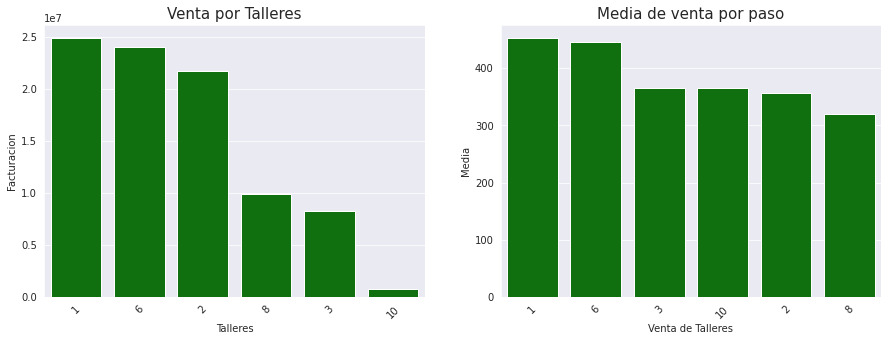

In [39]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.barplot(y = df_todos.groupby('Tall')['Fact_total'].sum().sort_values(ascending=False).head(10).values, # agrupamos por taller y facturación total
            x = df_todos.groupby('Tall')['Fact_total'].sum().sort_values(ascending=False).head(10).index, 
            color='green')

plt.ylabel('Facturacion')
plt.xlabel('Talleres')
plt.xticks(rotation=45)
plt.title('Venta por Talleres',size=15)

plt.subplot(1,2,2)
sns.barplot(y = df_todos.groupby('Tall')['Fact_total'].mean().sort_values(ascending=False).head(10).values, # agrupamos por taller y media de facturación por paso
            x = df_todos.groupby('Tall')['Fact_total'].mean().sort_values(ascending=False).head(10).index, 
            color='green')
# en este lo que hacemos es hayar valores unicos de numero de factura. 
plt.ylabel('Media')
plt.xlabel('Venta de Talleres')
plt.xticks(rotation=45)
plt.title('Media de venta por paso',size=15)

plt.show()

In [ ]:
df_todos.Fact_total.mean() # esta es la media de todos los valores. 

396.83316980573244

In [40]:
print(df_todos[df_todos["Tall"]=="1"]["Fact_total"].mean())
print(df_todos[df_todos["Tall"]=="6"]["Fact_total"].mean())
print(df_todos[df_todos["Tall"]=="3"]["Fact_total"].mean())
print(df_todos[df_todos["Tall"]=="2"]["Fact_total"].mean())
print(df_todos[df_todos["Tall"]=="8"]["Fact_total"].mean())
print(df_todos[df_todos["Tall"]=="10"]["Fact_total"].mean())
"""print(df[df["Tall"]=="2"]["Fact_total"].mean())
print(df[df["Tall"]=="10"]["Fact_total"].mean())
print(df[df["Tall"]=="8"]["Fact_total"].mean())"""

453.0858624454149
446.5078372153497
366.229057037922
357.38862688535403
319.8022819593787
365.6776614391144


'print(df[df["Tall"]=="2"]["Fact_total"].mean())\nprint(df[df["Tall"]=="10"]["Fact_total"].mean())\nprint(df[df["Tall"]=="8"]["Fact_total"].mean())'

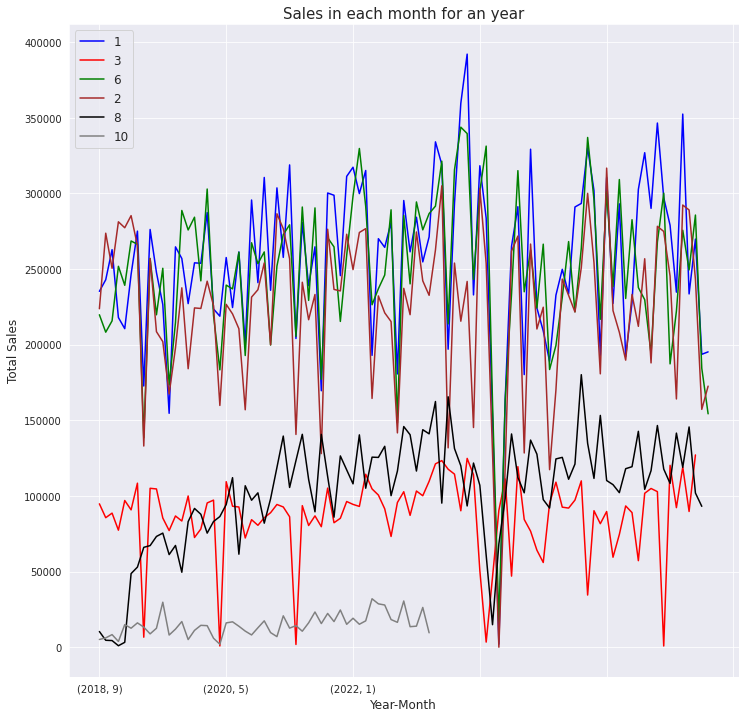

In [41]:
plt.figure(figsize=(12,12))
df_todos[df_todos['Tall']=='1'].groupby(['year','month'])['Fact_total'].sum().plot(kind='line',label='1',color='blue')
df_todos[df_todos['Tall']=='3'].groupby(['year','month'])['Fact_total'].sum().plot(kind='line',label='3',color='red')
df_todos[df_todos['Tall']=='6'].groupby(['year','month'])['Fact_total'].sum().plot(kind='line',label='6',color="green")
df_todos[df_todos['Tall']=='2'].groupby(['year','month'])['Fact_total'].sum().plot(kind='line',label='2',color="brown")
df_todos[df_todos['Tall']=='8'].groupby(['year','month'])['Fact_total'].sum().plot(kind='line',label='8',color="black")
df_todos[df_todos['Tall']=='10'].groupby(['year','month'])['Fact_total'].sum().plot(kind='line',label='10',color="grey")
"""df[df['Tall']=='6'].groupby(['year','month'])['Fact_total'].sum().plot(kind='line',label='6',color='brown')
df[df['Tall']=='8'].groupby(['year','month'])['Fact_total'].sum().plot(kind='line',label='8',color='black')
df[df['Tall']=='10'].groupby(['year','month'])['Fact_total'].sum().plot(kind='line',label='10',color='grey')"""
# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. 

plt.xlabel('Year-Month',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales in each month for an year', size=15)
plt.legend(fontsize=12)
plt.show()

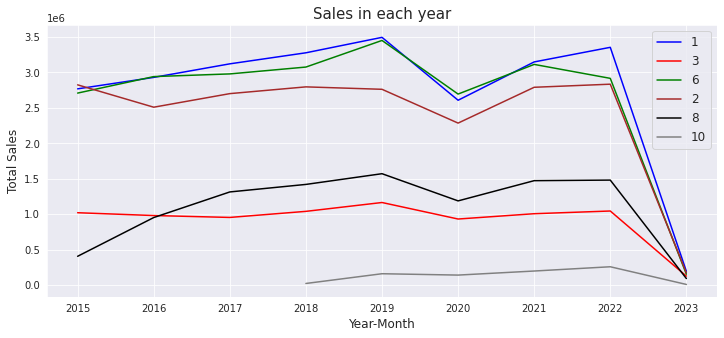

In [42]:
plt.figure(figsize=(12,5))
df_todos[df_todos['Tall']=='1'].groupby(['year'])['Fact_total'].sum().plot(kind='line',label='1',color='blue')
"""df_todos[df_todos['Tall']=='2'].groupby(['year'])['Fact_total'].sum().plot(kind='line',label='2',color='red')"""
df_todos[df_todos['Tall']=='3'].groupby(['year'])['Fact_total'].sum().plot(kind='line',label='3',color="red")
df_todos[df_todos['Tall']=='6'].groupby(['year'])['Fact_total'].sum().plot(kind='line',label='6',color='green')
df_todos[df_todos['Tall']=='2'].groupby(['year'])['Fact_total'].sum().plot(kind='line',label='2',color='brown')
df_todos[df_todos['Tall']=='8'].groupby(['year'])['Fact_total'].sum().plot(kind='line',label='8',color='black')
df_todos[df_todos['Tall']=='10'].groupby(['year'])['Fact_total'].sum().plot(kind='line',label='10',color='grey')
"""df_todos[df_todos['Tall']=='8'].groupby(['year'])['Fact_total'].sum().plot(kind='line',label='8',color='black')
df_todos[df_todos['Tall']=='10'].groupby(['year'])['Fact_total'].sum().plot(kind='line',label='10',color='grey')"""
# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. 

plt.xlabel('Year-Month',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales in each year', size=15)
plt.xticks([2015,2016,2017,2018,2019,2020,2021,2022,2023])
plt.legend(fontsize=12)
plt.show()

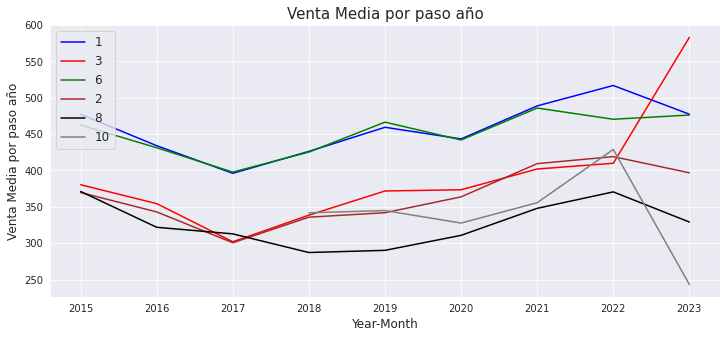

In [43]:
plt.figure(figsize=(12,5))
df_todos[df_todos['Tall']=='1'].groupby(['year'])['Fact_total'].mean().plot(kind='line',label='1',color='blue')
"""df_todos[df_todos['Tall']=='2'].groupby(['year'])['Fact_total'].sum().plot(kind='line',label='2',color='red')"""
df_todos[df_todos['Tall']=='3'].groupby(['year'])['Fact_total'].mean().plot(kind='line',label='3',color="red")
df_todos[df_todos['Tall']=='6'].groupby(['year'])['Fact_total'].mean().plot(kind='line',label='6',color='green')
df_todos[df_todos['Tall']=='2'].groupby(['year'])['Fact_total'].mean().plot(kind='line',label='2',color='brown')
df_todos[df_todos['Tall']=='8'].groupby(['year'])['Fact_total'].mean().plot(kind='line',label='8',color='black')
df_todos[df_todos['Tall']=='10'].groupby(['year'])['Fact_total'].mean().plot(kind='line',label='10',color='grey')
"""df_todos[df_todos['Tall']=='8'].groupby(['year'])['Fact_total'].sum().plot(kind='line',label='8',color='black')
df_todos[df_todos['Tall']=='10'].groupby(['year'])['Fact_total'].sum().plot(kind='line',label='10',color='grey')"""
# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. 

plt.xlabel('Year-Month',size=12)
plt.ylabel('Venta Media por paso año', size=12)
plt.title('Venta Media por paso año', size=15)
plt.xticks([2015,2016,2017,2018,2019,2020,2021,2022,2023])
plt.legend(fontsize=12)
plt.show()

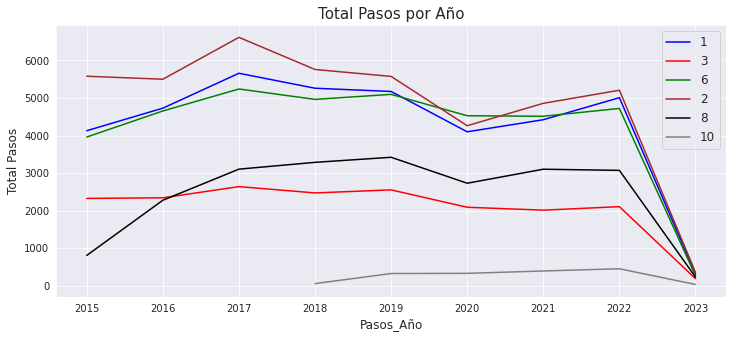

In [44]:
plt.figure(figsize=(12,5))
df_todos[df_todos['Tall']=='1'].groupby(['year'])['Orden_Corta2'].nunique().plot(kind='line',label='1',color='blue')
"""df_todos[df_todos['Tall']=='2'].groupby(['year'])['Orden_Corta2'].sum().plot(kind='line',label='2',color='red')"""
df_todos[df_todos['Tall']=='3'].groupby(['year'])['Orden_Corta2'].nunique().plot(kind='line',label='3',color="red")
df_todos[df_todos['Tall']=='6'].groupby(['year'])['Orden_Corta2'].nunique().plot(kind='line',label='6',color='green')
df_todos[df_todos['Tall']=='2'].groupby(['year'])['Orden_Corta2'].nunique().plot(kind='line',label='2',color='brown')
df_todos[df_todos['Tall']=='8'].groupby(['year'])['Orden_Corta2'].nunique().plot(kind='line',label='8',color='black')
df_todos[df_todos['Tall']=='10'].groupby(['year'])['Orden_Corta2'].nunique().plot(kind='line',label='10',color='grey')
"""df_todos[df_todos['Tall']=='8'].groupby(['year'])['Orden_Corta2'].sum().plot(kind='line',label='8',color='black')
df_todos[df_todos['Tall']=='10'].groupby(['year'])['Orden_Corta2'].sum().plot(kind='line',label='10',color='grey')"""
# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. 

plt.xlabel('Pasos_Año',size=12)
plt.ylabel('Total Pasos', size=12)
plt.title('Total Pasos por Año', size=15)
plt.xticks([2015,2016,2017,2018,2019,2020,2021,2022,2023])
plt.legend(fontsize=12)
plt.show()

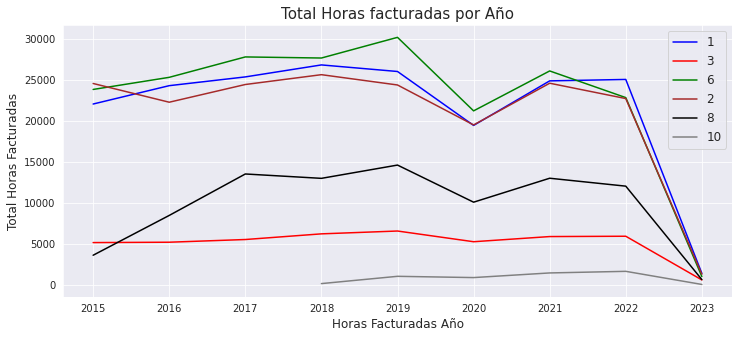

In [45]:
plt.figure(figsize=(12,5))
df_todos[df_todos['Tall']=='1'].groupby(['year'])['Tiemp_Fact'].sum().plot(kind='line',label='1',color='blue')
"""df_todos[df_todos['Tall']=='2'].groupby(['year'])['Tiemp_Fact'].sum().plot(kind='line',label='2',color='red')"""
df_todos[df_todos['Tall']=='3'].groupby(['year'])['Tiemp_Fact'].sum().plot(kind='line',label='3',color="red")
df_todos[df_todos['Tall']=='6'].groupby(['year'])['Tiemp_Fact'].sum().plot(kind='line',label='6',color='green')
df_todos[df_todos['Tall']=='2'].groupby(['year'])['Tiemp_Fact'].sum().plot(kind='line',label='2',color='brown')
df_todos[df_todos['Tall']=='8'].groupby(['year'])['Tiemp_Fact'].sum().plot(kind='line',label='8',color='black')
df_todos[df_todos['Tall']=='10'].groupby(['year'])['Tiemp_Fact'].sum().plot(kind='line',label='10',color='grey')
"""df_todos[df_todos['Tall']=='8'].groupby(['year'])['Tiemp_Fact'].sum().plot(kind='line',label='8',color='black')
df_todos[df_todos['Tall']=='10'].groupby(['year'])['Tiemp_Fact'].sum().plot(kind='line',label='10',color='grey')"""
# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. 

plt.xlabel('Horas Facturadas Año',size=12)
plt.ylabel('Total Horas Facturadas', size=12)
plt.title('Total Horas facturadas por Año', size=15)
plt.xticks([2015,2016,2017,2018,2019,2020,2021,2022,2023])
plt.legend(fontsize=12)
plt.show()

In [46]:
df_todos.columns

Index(['Tall', 'Referencia', 'Fecha_Fact', 'Fecha_Apertura', 'Cta_Cargo',
       'Nombre_Cliente', 'Cta_Titular', 'Nombre_Titular', 'Recamb',
       'Recamb_Pvp', 'Tiemp_Fact', 'Total_Mo', 'Modelo', 'Recep', 'Matricula',
       'Bastidor', 'Tipo_Or', 'Or_Unica', 'MES', 'AÑO', 'ESTANCIA',
       'Orden_Corta', 'Fact_total', 'Orden_Corta2', 'year', 'month', 'day',
       'day_of_week'],
      dtype='object')

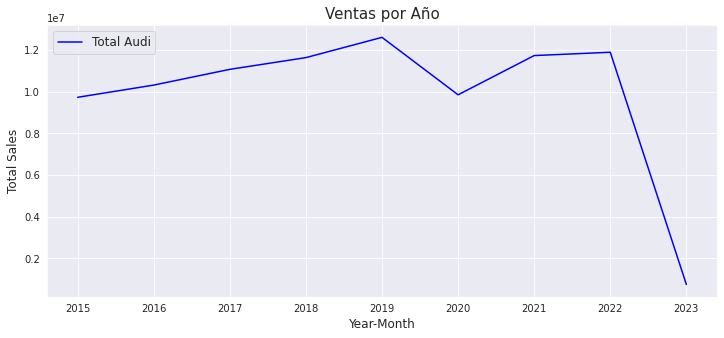

In [47]:
plt.figure(figsize=(12,5))
df_todos.groupby(['year'])['Fact_total'].sum().plot(kind='line',label='Total Audi',color='blue')


plt.xlabel('Year-Month',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Ventas por Año', size=15)
plt.xticks([2015,2016,2017,2018,2019,2020,2021,2022,2023])
plt.legend(fontsize=12)
plt.show()

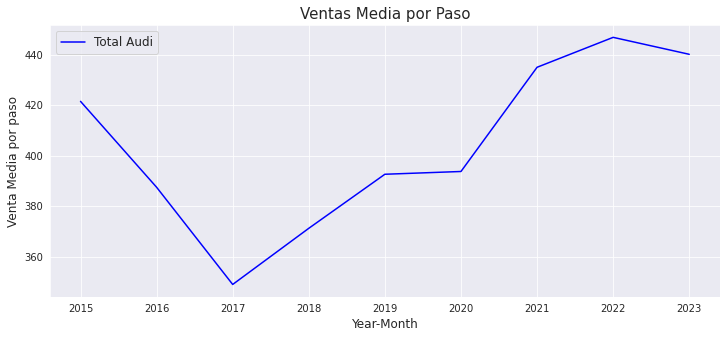

In [48]:
plt.figure(figsize=(12,5))
df_todos.groupby(['year'])['Fact_total'].mean().plot(kind='line',label='Total Audi',color='blue')


plt.xlabel('Year-Month',size=12)
plt.ylabel('Venta Media por paso', size=12)
plt.title('Ventas Media por Paso', size=15)
plt.xticks([2015,2016,2017,2018,2019,2020,2021,2022,2023])
plt.legend(fontsize=12)
plt.show()

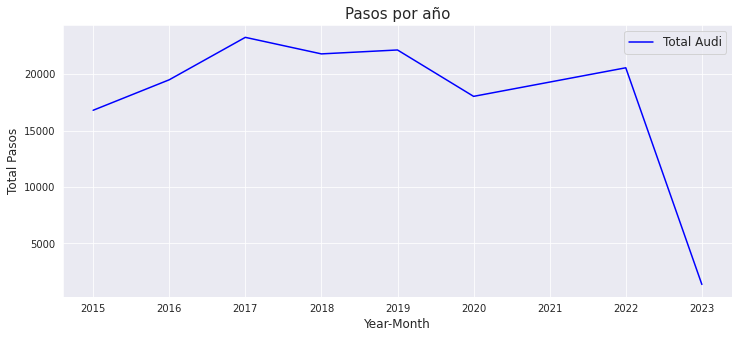

In [49]:
plt.figure(figsize=(12,5))
df_todos.groupby(['year'])['Orden_Corta2'].nunique().plot(kind='line',label='Total Audi',color='blue')


plt.xlabel('Year-Month',size=12)
plt.ylabel('Total Pasos', size=12)
plt.title('Pasos por año', size=15)
plt.xticks([2015,2016,2017,2018,2019,2020,2021,2022,2023])
plt.legend(fontsize=12)
plt.show()

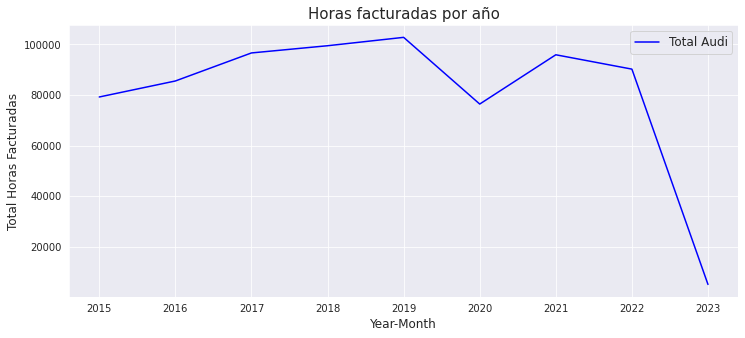

In [50]:
plt.figure(figsize=(12,5))
df_todos.groupby(['year'])['Tiemp_Fact'].sum().plot(kind='line',label='Total Audi',color='blue')


plt.xlabel('Year-Month',size=12)
plt.ylabel('Total Horas Facturadas', size=12)
plt.title('Horas facturadas por año', size=15)
plt.xticks([2015,2016,2017,2018,2019,2020,2021,2022,2023])
plt.legend(fontsize=12)
plt.show()

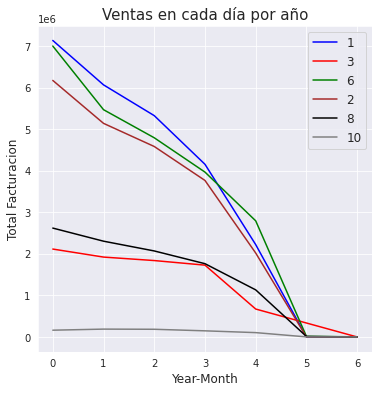

In [51]:
# ahora hacemos lo mismo pero lo vamos a ver por día de la semana. 

plt.figure(figsize=(6,6))
df_todos[df_todos['Tall']=='1'].groupby(['day_of_week'])['Fact_total'].sum().plot(kind='line',label='1',color='blue')
"""df_todos[df_todos['Tall']=='2'].groupby(['day_of_week'])['Fact_total'].sum().plot(kind='line',label='2',color='red')"""
df_todos[df_todos['Tall']=='3'].groupby(['day_of_week'])['Fact_total'].sum().plot(kind='line',label='3',color="red")
df_todos[df_todos['Tall']=='6'].groupby(['day_of_week'])['Fact_total'].sum().plot(kind='line',label='6',color="green")
df_todos[df_todos['Tall']=='2'].groupby(['day_of_week'])['Fact_total'].sum().plot(kind='line',label='2',color='brown')
df_todos[df_todos['Tall']=='8'].groupby(['day_of_week'])['Fact_total'].sum().plot(kind='line',label='8',color='black')
df_todos[df_todos['Tall']=='10'].groupby(['day_of_week'])['Fact_total'].sum().plot(kind='line',label='10',color='grey')
"""df_todos[df_todos['Tall']=='8'].groupby(['day_of_week'])['Fact_total'].sum().plot(kind='line',label='8',color='black')
df_todos[df_todos['Tall']=='10'].groupby(['day_of_week'])['Fact_total'].sum().plot(kind='line',label='10',color='grey')"""
# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. 

plt.xlabel('Year-Month',size=12)
plt.ylabel('Total Facturacion', size=12)
plt.title('Ventas en cada día por año', size=15)
plt.legend(fontsize=12)
plt.show()

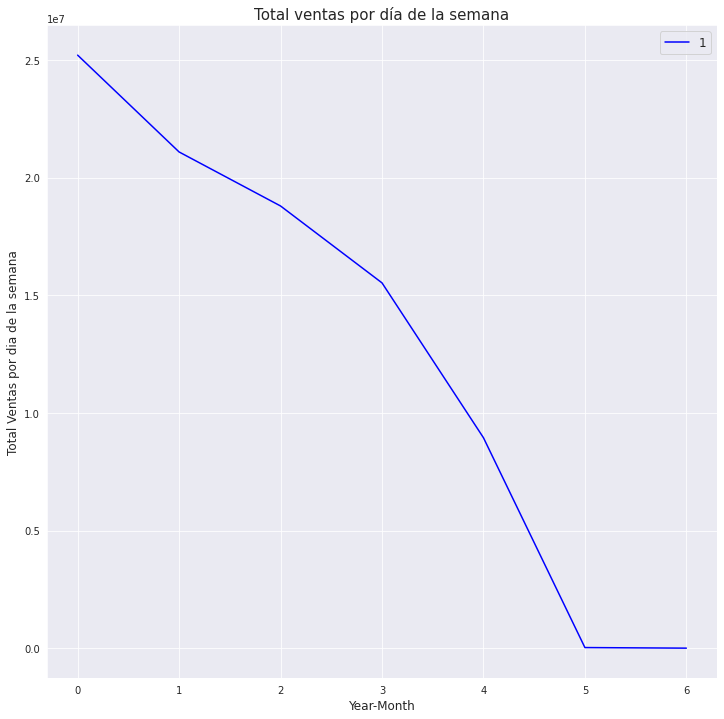

In [52]:
# ahora hacemos lo mismo pero lo vamos a ver por día de la semana. 

plt.figure(figsize=(12,12))
df_todos.groupby(['day_of_week'])['Fact_total'].sum().plot(kind='line',label='1',color='blue')


plt.xlabel('Year-Month',size=12)
plt.ylabel('Total Ventas por dia de la semana', size=12)
plt.title('Total ventas por día de la semana', size=15)
plt.legend(fontsize=12)
plt.show()

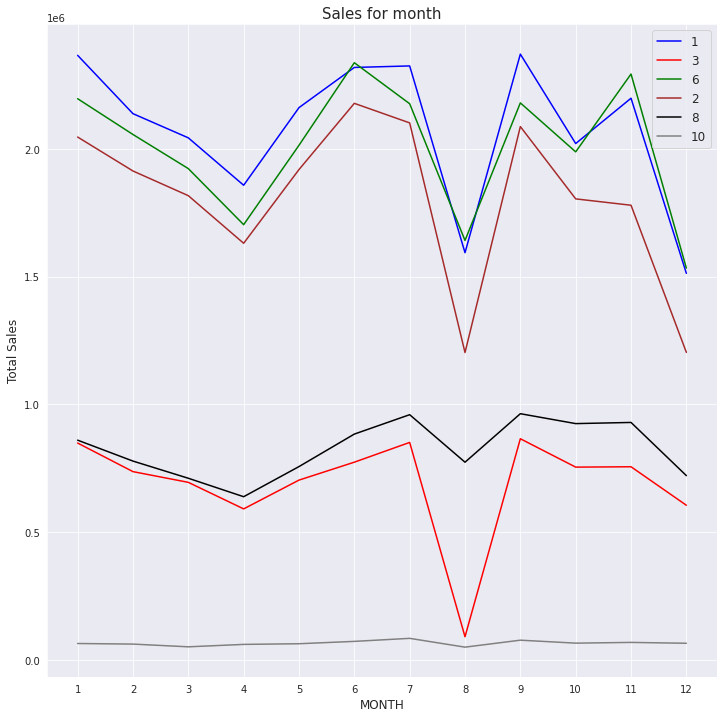

In [53]:
# ahora hacemos lo mismo pero por mes

plt.figure(figsize=(12,12))
df_todos[df_todos['Tall']=='1'].groupby(['month'])['Fact_total'].sum().plot(kind='line',label='1',color='blue')
"""df_todos[df_todos['Tall']=='2'].groupby(['month'])['Fact_total'].sum().plot(kind='line',label='2',color='red')"""
df_todos[df_todos['Tall']=='3'].groupby(['month'])['Fact_total'].sum().plot(kind='line',label='3',color="red")
df_todos[df_todos['Tall']=='6'].groupby(['month'])['Fact_total'].sum().plot(kind='line',label='6',color='green')
df_todos[df_todos['Tall']=='2'].groupby(['month'])['Fact_total'].sum().plot(kind='line',label='2',color='brown')
df_todos[df_todos['Tall']=='8'].groupby(['month'])['Fact_total'].sum().plot(kind='line',label='8',color='black')
df_todos[df_todos['Tall']=='10'].groupby(['month'])['Fact_total'].sum().plot(kind='line',label='10',color='grey')
"""df_todos[df_todos['Tall']=='8'].groupby(['month'])['Fact_total'].sum().plot(kind='line',label='8',color='black')
df_todos[df_todos['Tall']=='10'].groupby(['month'])['Fact_total'].sum().plot(kind='line',label='10',color='grey')"""


# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. 

plt.xlabel('MONTH',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales for month', size=15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.legend(fontsize=12)
plt.show()

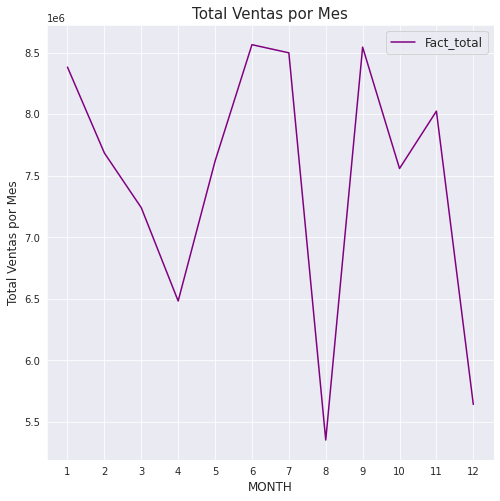

In [54]:
# ahora hacemos lo mismo pero por mes

plt.figure(figsize=(8,8))
df_todos.groupby(['month'])['Fact_total'].sum().plot(kind='line',color='purple')


# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. 

plt.xlabel('MONTH',size=12)
plt.ylabel('Total Ventas por Mes', size=12)
plt.title('Total Ventas por Mes', size=15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.legend(fontsize=12)

In [55]:
df_todos.columns

Index(['Tall', 'Referencia', 'Fecha_Fact', 'Fecha_Apertura', 'Cta_Cargo',
       'Nombre_Cliente', 'Cta_Titular', 'Nombre_Titular', 'Recamb',
       'Recamb_Pvp', 'Tiemp_Fact', 'Total_Mo', 'Modelo', 'Recep', 'Matricula',
       'Bastidor', 'Tipo_Or', 'Or_Unica', 'MES', 'AÑO', 'ESTANCIA',
       'Orden_Corta', 'Fact_total', 'Orden_Corta2', 'year', 'month', 'day',
       'day_of_week'],
      dtype='object')

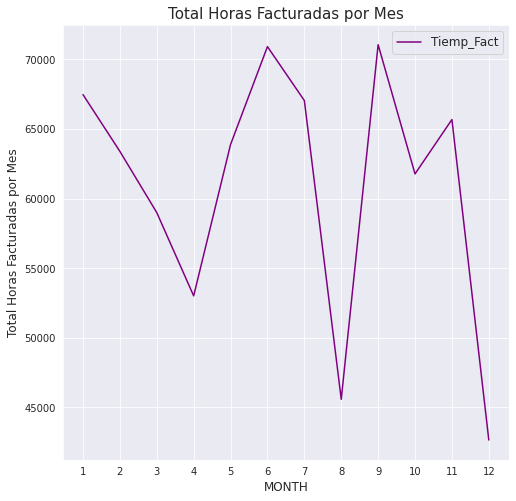

In [56]:
# ahora hacemos lo mismo pero por mes

plt.figure(figsize=(8,8))
df_todos.groupby(["month"])['Tiemp_Fact'].sum().plot(kind='line',color='purple')


# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. 

plt.xlabel('MONTH',size=12)
plt.ylabel('Total Horas Facturadas por Mes', size=12)
plt.title('Total Horas Facturadas por Mes', size=15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.legend(fontsize=12)

In [ ]:
# ahora hacemos lo mismo pero por mes

plt.figure(figsize=(12,12))
df_audi[df_audi['Tall']=='1'].groupby(['day'])['Fact_total'].sum().plot(kind='line',label='1',color='blue')
df_audi[df_audi['Tall']=='2'].groupby(['day'])['Fact_total'].sum().plot(kind='line',label='2',color='red')
df_audi[df_audi['Tall']=='3'].groupby(['day'])['Fact_total'].sum().plot(kind='line',label='3',color="green")
df_audi[df_audi['Tall']=='6'].groupby(['day'])['Fact_total'].sum().plot(kind='line',label='6',color='brown')
df_audi[df_audi['Tall']=='8'].groupby(['day'])['Fact_total'].sum().plot(kind='line',label='8',color='black')
df_audi[df_audi['Tall']=='10'].groupby(['day'])['Fact_total'].sum().plot(kind='line',label='10',color='grey')
# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. 

plt.xlabel('DAY',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales for day of month', size=15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31])
plt.legend(fontsize=12)
plt.show()

NameError: ignored

<Figure size 864x864 with 0 Axes>

In [ ]:
# ahora hacemos lo mismo pero por mes

plt.figure(figsize=(12,12))
df_audi.groupby(['day'])['Fact_total'].sum().plot(kind='line',color='blue')

# agrupamos por año y mes y sumamos la cantidad. Lo hemos agrupado por talleres. 

plt.xlabel('DAY',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales for day of month', size=15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31])
plt.legend(fontsize=12)
plt.show()

NameError: ignored

<Figure size 864x864 with 0 Axes>

In [57]:
df_cohort_todos = df_todos.copy()

In [58]:
print("la fecha va desde {} a {}".format(df_cohort_todos.Fecha_Apertura.min(), df_cohort_todos.Fecha_Apertura.max()))

la fecha va desde 2015-01-02 00:00:00 a 2023-01-31 00:00:00


- vamos a crear tres columnas nuevas. 
    - Invoice Month. representa el string el mes y año de una factura concreta. 
    - Cohort Month. representa el string el año y el mes de la primera compra de cada cliente. 
    - Cohort Period. representa el string del ciclo de vida del cliente. el numero de meses representa el numero de meses desde la primera compra. 

In [ ]:
"""# creating the first variable 'Invoice Month'
# extracting only year-month from Invoice Date and day will be 1 automatically

df_cohort['InvoiceMonth'] = df_cohort['Fecha_Apertura'].dt.strftime('%Y-%m') # lo convierte en formato strftime. Estamos poniendo todas las fecha a día 1
# luego en formato fecha. 
# converting the variable to datetime format
df_cohort['InvoiceMonth'] = pd.to_datetime(df_cohort['InvoiceMonth'])"""

In [59]:
# voy a intentar cambiar de mes a año. 
# creating the first variable 'Invoice Month'
# extracting only year-month from Invoice Date and day will be 1 automatically

df_cohort_todos['InvoiceYear'] = df_cohort_todos['Fecha_Apertura'].dt.strftime("%Y") # Estamos convirtiendo tanto el mes como el día a 1
# luego en formato fecha. 
# converting the variable to datetime format
df_cohort_todos['InvoiceYear'] = pd.to_datetime(df_cohort_todos['InvoiceYear'])

In [60]:
df_cohort_todos.InvoiceYear

7        2015-01-01
9        2015-01-01
24       2015-01-01
35       2015-01-01
37       2015-01-01
            ...    
311354   2023-01-01
311355   2023-01-01
311356   2023-01-01
311357   2023-01-01
311359   2023-01-01
Name: InvoiceYear, Length: 225199, dtype: datetime64[ns]

In [61]:
# creating the second variable 'Cohort Month'
# getting the first time purchase date for each customer

df_cohort_todos['CohortYear'] = df_cohort_todos.groupby('Bastidor')['InvoiceYear'].transform('min') # aqui saca la primera compra. 
# converting the variable to datetime format
df_cohort_todos['CohortYear'] = pd.to_datetime(df_cohort_todos['CohortYear'])

In [62]:
df_cohort_todos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225199 entries, 7 to 311359
Data columns (total 30 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Tall            225199 non-null  object        
 1   Referencia      225199 non-null  object        
 2   Fecha_Fact      225199 non-null  datetime64[ns]
 3   Fecha_Apertura  225199 non-null  datetime64[ns]
 4   Cta_Cargo       225199 non-null  object        
 5   Nombre_Cliente  225199 non-null  object        
 6   Cta_Titular     225199 non-null  object        
 7   Nombre_Titular  225199 non-null  object        
 8   Recamb          225199 non-null  float64       
 9   Recamb_Pvp      225199 non-null  float64       
 10  Tiemp_Fact      225193 non-null  float64       
 11  Total_Mo        225199 non-null  float64       
 12  Modelo          225199 non-null  object        
 13  Recep           225199 non-null  object        
 14  Matricula       225199 non-null  obj

In [ ]:
"""# aqui creamos la tercera variable. el periodo cohort. 
# calculamos el numero de meses desde la primera compra a la fecha de la factura. 
# creating the third variable 'Cohort Period'
# for this we create a function which calculates the number of month between their first purchase date and Invoice date

def diff_month(d1, d2):
    return((d1.dt.year - d2.dt.year) * 12 + d1.dt.month - d2.dt.month)
    # multiplica * 12 para convertir la diferencia en años en meses. luego le suma los meses del ultimo año. 

df_cohort['CohortPeriod'] = diff_month(df_cohort['InvoiceMonth'], df_cohort['CohortMonth'])"""

In [63]:
# aqui creamos la tercera variable. el periodo cohort. 
# calculamos el numero de meses desde la primera compra a la fecha de la factura. 
# creating the third variable 'Cohort Period'
# for this we create a function which calculates the number of month between their first purchase date and Invoice date

def diff_Year(d1, d2):
    return((d1.dt.year - d2.dt.year))
    # multiplica * 12 para convertir la diferencia en años en meses. luego le suma los meses del ultimo año. 

df_cohort_todos['CohortPeriod'] = diff_Year(df_cohort_todos['InvoiceYear'], df_cohort_todos['CohortYear'])

In [64]:
df_cohort_todos.sample(5)

,Tall,Referencia,Fecha_Fact,Fecha_Apertura,Cta_Cargo,Nombre_Cliente,Cta_Titular,Nombre_Titular,Recamb,Recamb_Pvp,Tiemp_Fact,Total_Mo,Modelo,Recep,Matricula,Bastidor,Tipo_Or,Or_Unica,MES,AÑO,ESTANCIA,Orden_Corta,Fact_total,Orden_Corta2,year,month,day,day_of_week,InvoiceYear,CohortYear,CohortPeriod
289685,6,13823461,2022-07-08,2022-07-07,147410,ORTIZ MONTES JOSE ALBER,147410,ORTIZ MONTES JOSE ALBER,633.32,1350.08,4.70,108.36,A4 B6 2.0,679,0408CZY,WAUZZZ8E35A071032,2A O.R.CLIENT MEC AUDI-CO,nan,7,2022,1,1382346,741.68,1382346,2022,7,7,3,2022-01-01,2015-01-01,7
242056,1,12880402,2021-04-14,2021-04-12,116,ORDENES DE REPARACION G,191915,ESTUDIO ARUQE DESINGS S,458.82,1007.14,0.74,53.31,A4,294,0252DZW,WAUZZZ8E76A260719,4A GARANTIA MECAN AUDI,nan,4,2021,2,1288040,512.13,1288040,2021,4,12,0,2021-01-01,2021-01-01,0
226062,2,12554851,2020-11-18,2020-11-17,12674,LOSADA GARCIA MIGUEL,12674,LOSADA GARCIA MIGUEL,0.00,0.00,0.70,56.70,PASSAT VAR,295,5815FZN,WVWZZZ3CZ8E127182,2V O.R.CLIENT MEC VW,nan,11,2020,1,1255485,56.70,1255485,2020,11,17,1,2020-01-01,2015-01-01,5
119584,3,10390461,2018-04-25,2018-04-23,116,ORDENES DE REPARACION G,144133,GEMMA LERIN HERNANDEZ,42.12,92.26,1.52,107.67,AUDI A4 AV,63,7353HDY,WAUZZZ8KXBA159884,4A GARANTIA MECAN AUDI,nan,4,2018,2,1039046,149.79,1039046,2018,4,23,0,2018-01-01,2017-01-01,1
212789,1,12280841,2020-07-24,2020-07-10,98253,MUTUA MADRILEÑA AUTOMOV,186294,ABEJON ROALES ALEJANDRO,265.31,644.32,2.20,71.44,TT,294,6944FSM,TRUZZZ8JX71035749,7A PRESUPUESTO CH AUDI,nan,7,2020,14,1228084,336.75,1228084,2020,7,10,4,2020-01-01,2020-01-01,0


In [65]:
customer_cohort_todos = df_cohort_todos.pivot_table(index='CohortYear', columns='CohortPeriod', values='Bastidor', aggfunc='nunique')
customer_cohort_todos
# aqui lo que hacemos es una pivot table. donde el index son las fechas de Cohort month
# las columnas son el cohort period, los valores son el count de customer id, y con aggfunc le pedimos que sean únicos. 

CohortPeriod,0,1,2,3,4,5,6,7,8
CohortYear,,,,,,,,,
2015-01-01,12001.0,5956.0,5866.0,4300.0,3646.0,2683.0,2496.0,2170.0,172.0
2016-01-01,7260.0,3158.0,3109.0,1987.0,1704.0,1250.0,1309.0,81.0,NaN
2017-01-01,6521.0,2391.0,2193.0,1498.0,1227.0,988.0,89.0,NaN,NaN
2018-01-01,5795.0,2260.0,1950.0,1377.0,1248.0,76.0,NaN,NaN,NaN
2019-01-01,5852.0,2023.0,2094.0,1487.0,138.0,NaN,NaN,NaN,NaN
2020-01-01,4435.0,1491.0,1564.0,101.0,NaN,NaN,NaN,NaN,NaN
2021-01-01,4805.0,1869.0,179.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01,4991.0,183.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-01,328.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- la tabla de arriba representa la retención y la adquisición de nuevos clientes. 
    - Verticalmente la columna 0 representa cuantos clientes hicieron su primera compra por año
        - por ejemplo 8859 del 2016 son los nuevos clientes diferentes de la primera fecha que es el 2015. al siguiente año fueron 7419 nuevos diferentes a abril del 2015 y así sucesivamente. 
    - horizontalmente. la primera columna nos dice cuantos clientes siguen siendo clientes. 
        - ejemplo de los 13975 clientes dem 2015 el siguiente año repiten 6630 en el año 2 repiten 6624 y asi sucesivamente.  

In [ ]:
customer_cohort_audi.to_excel("/content/drive/MyDrive/Colab Notebooks/pivot_audi.xlsx", index=False)

In [ ]:
# Retention table
# lo mismo que lo anterior pero expresado en porcentajes. 

cohort_size = customer_cohort_todos.iloc[:,0] # todas las filas y la primera columna. customer_cohort es la pivot table. 
# cogemos la primera fila 0, porque será el dividendo de todos los calculos
retention = customer_cohort_todos.divide(cohort_size,axis=0) #axis=0 to ensure the divide along the row axis
# dividimos todos los valores entre la primera columna que es cohort_size
retention.index = pd.to_datetime(retention.index).date
retention.round(3) * 100 #to show the number as percentage

CohortPeriod,0,1,2,3,4,5,6,7
2015-01-01,100.0,49.6,48.9,35.8,30.4,22.4,20.8,17.4
2016-01-01,100.0,43.5,42.8,27.4,23.5,17.2,17.1,NaN
2017-01-01,100.0,36.7,33.6,23.0,18.8,14.4,NaN,NaN
2018-01-01,100.0,39.0,33.6,23.8,20.3,NaN,NaN,NaN
2019-01-01,100.0,34.6,35.8,24.3,NaN,NaN,NaN,NaN
2020-01-01,100.0,33.6,33.8,NaN,NaN,NaN,NaN,NaN
2021-01-01,100.0,36.6,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


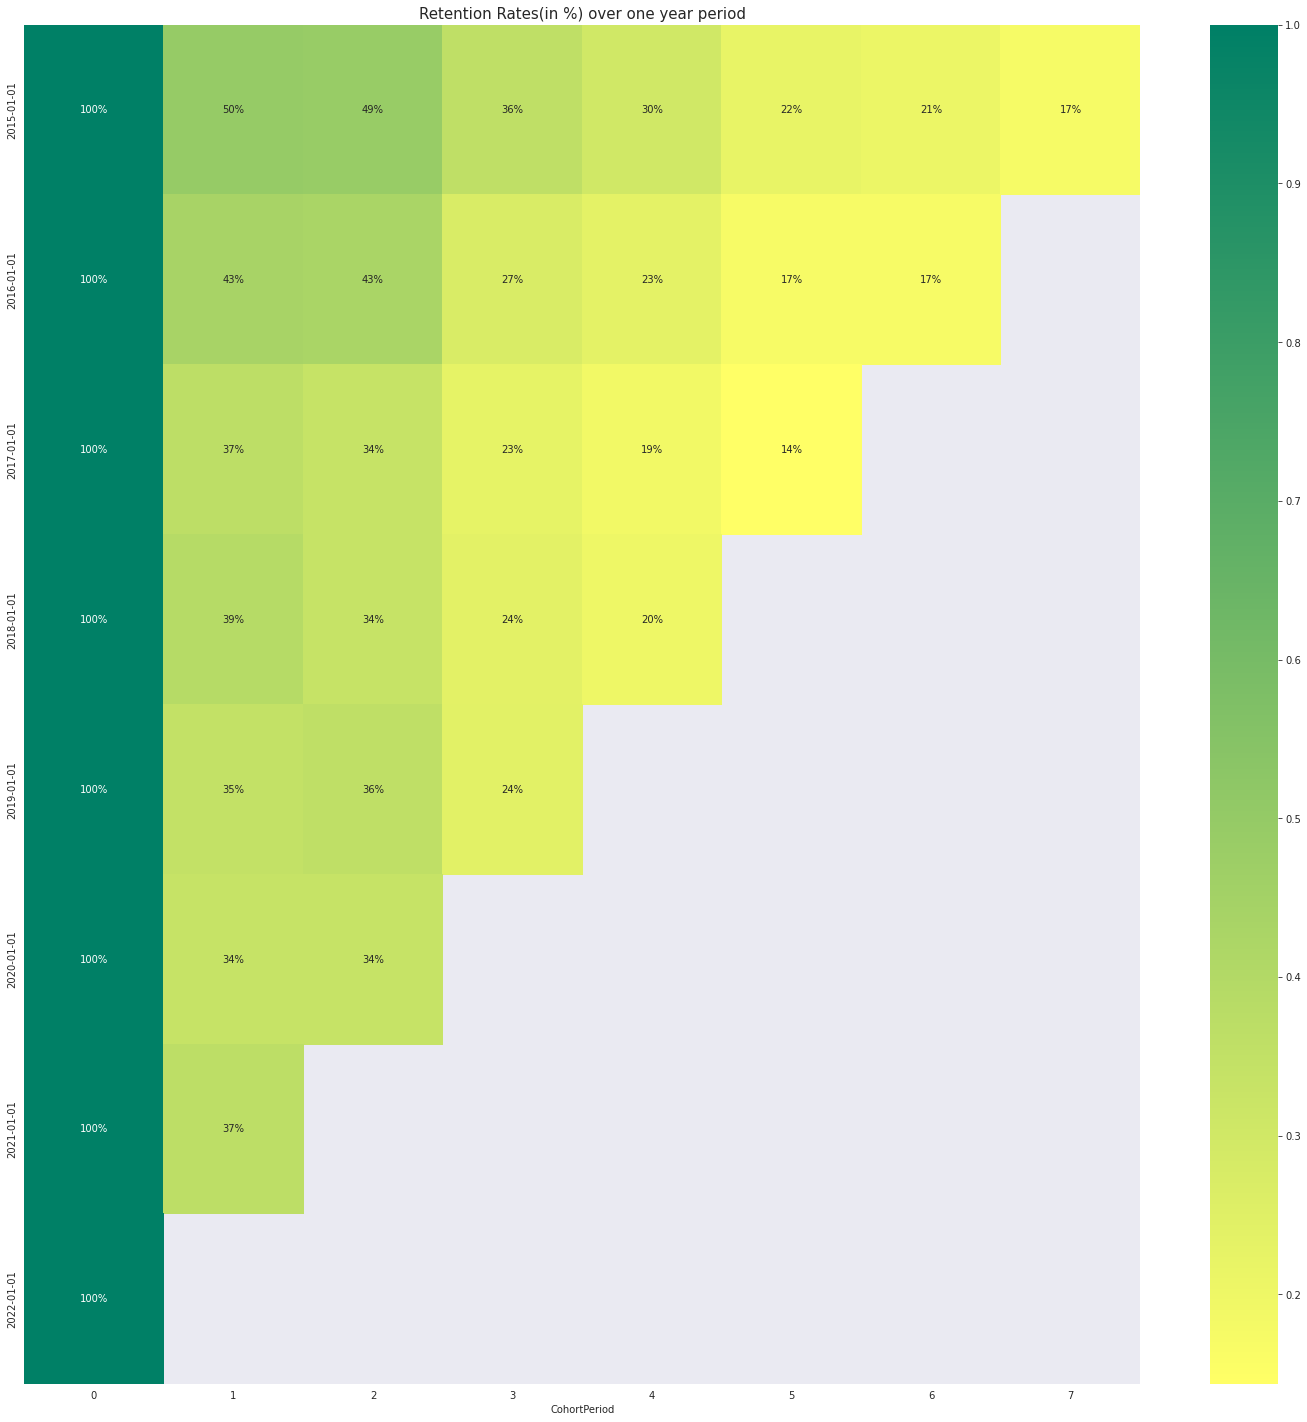

In [ ]:
#Build the heatmap or pictorial representation of above table

plt.figure(figsize=(25, 25))
plt.title('Retention Rates(in %) over one year period', size=15)
sns.heatmap(data=retention, annot = True, fmt = '.0%', cmap="summer_r")
plt.show()
# lo mismo que lo anterior pero con un heatmap. 
# tengo que hacerlo por años salen muchos meses, aparte de quitar los años anteriores al 2015

In [ ]:
amount_cohort_todos = df_cohort_todos.pivot_table(index='CohortYear', columns='CohortPeriod', values='Fact_total', aggfunc='mean').round(2)
# aqui utilizamos cantidad la aggfunc es la media.
amount_cohort_todos
# aqui estamos sacando la facturación media por paso de clientes en cada fecha. 

CohortPeriod,0,1,2,3,4,5,6,7
CohortYear,,,,,,,,
2015-01-01,421.55,405.96,390.78,444.75,502.15,478.20,540.21,534.55
2016-01-01,369.01,321.49,364.82,427.35,427.57,473.97,491.99,NaN
2017-01-01,317.48,343.15,353.43,359.13,447.13,460.91,NaN,NaN
2018-01-01,322.06,327.56,349.06,409.29,430.25,NaN,NaN,NaN
2019-01-01,349.16,362.08,391.86,435.86,NaN,NaN,NaN,NaN
2020-01-01,379.92,393.66,426.24,NaN,NaN,NaN,NaN,NaN
2021-01-01,404.04,411.50,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01,402.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# RFM ANALISIS

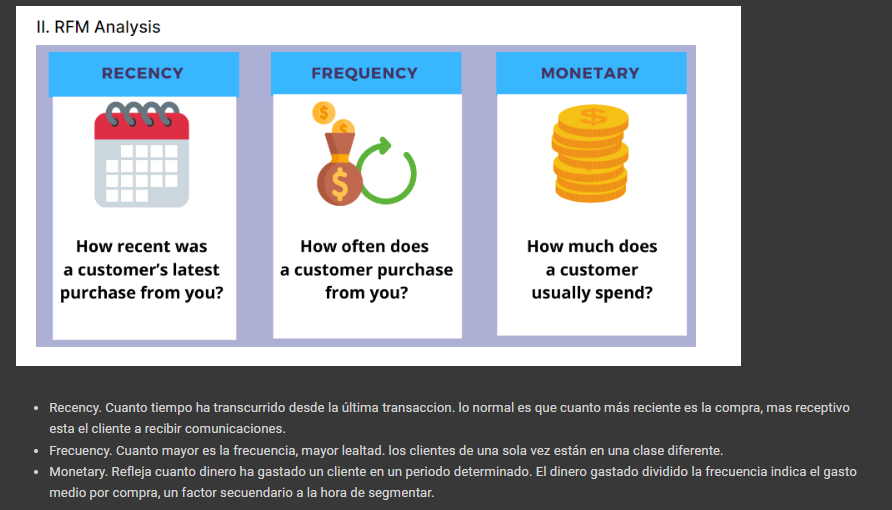

In [ ]:
df_rfm_audi = df_audi.copy() # hacemos la copia del original. 

In [ ]:
# extracting the RECENCY

recency = pd.DataFrame(df_rfm_audi.groupby('Bastidor')['Fecha_Apertura'].max().reset_index())
# creamos la variable recency
recency['Fecha_Apertura'] = pd.to_datetime(recency['Fecha_Apertura']).dt.date # convertimos a fecha InvoiceDate
recency['MaxDate'] = recency['Fecha_Apertura'].max() # sacamos el valor maximo
recency['recency'] = (recency['MaxDate'] - recency['Fecha_Apertura']).dt.days + 1 # diferencia entre la fecha maxima de todas las facturas y la fecha maxima del bastidor en cuestión. 
recency = recency[['Bastidor','recency']] # elegimos las variables a mostrar. 
recency.head()

,Bastidor,recency
0,WAUZZZ4L97D07664,629
1,WAUZZZ8E55A50910,1676
2,WAUZZZ8P07A02124,385
3,WAUZZZ8P1CA04845,2275
4,WAUZZZ8T4EA06800,836


In [ ]:
# extracting the FREQUENCY

frequency = pd.DataFrame(df_rfm_audi.groupby('Bastidor')['Orden_Corta2'].nunique().reset_index())
frequency.columns = ['fBastidor','frequency']
frequency.head()

,fBastidor,frequency
0,WAUZZZ4L97D07664,5
1,WAUZZZ8E55A50910,1
2,WAUZZZ8P07A02124,2
3,WAUZZZ8P1CA04845,1
4,WAUZZZ8T4EA06800,6


In [ ]:
frequency.isnull().sum()

fBastidor    0
frequency    0
dtype: int64

In [ ]:
# extracting the MONETARY

monetary = pd.DataFrame(df_rfm_audi.groupby('Bastidor')['Fact_total'].sum().reset_index())
monetary.columns = ['mBastidor','monetary']
monetary.head()

,mBastidor,monetary
0,WAUZZZ4L97D07664,1233.45
1,WAUZZZ8E55A50910,1144.53
2,WAUZZZ8P07A02124,757.33
3,WAUZZZ8P1CA04845,208.16
4,WAUZZZ8T4EA06800,10582.17


In [ ]:
# combining the three into one table

rfm_audi = pd.concat([recency,frequency,monetary], axis=1) # este es el nombre de cada dataframe
rfm_audi.drop(['fBastidor',"mBastidor"], axis=1, inplace=True)
rfm_audi.head(10)

,Bastidor,recency,frequency,monetary
0,WAUZZZ4L97D07664,629,5,1233.45
1,WAUZZZ8E55A50910,1676,1,1144.53
2,WAUZZZ8P07A02124,385,2,757.33
3,WAUZZZ8P1CA04845,2275,1,208.16
4,WAUZZZ8T4EA06800,836,6,10582.17
5,WAUZZZ8TX8A00452,1688,1,156.80
6,WAUZZZ8X1EB11477,2190,1,261.59
7,WAUZZZ8X3HB04230,1017,1,388.49
8,000000000FC001550,2500,1,36.66
9,0JN1TC32U00005574,1919,1,39.00


- Hemos extraido los tres pilares de RFM. Aunque odemos calcular más variables.
- por ejemplo podríamos crear la velocidad de la visita. es decir cada cuanto tiempo viene. 
    - ejemplo. supongamos que un cliente visita una tienda 10 veces al año, su frecuencia es de 10. compra algunos artículos por valor de 3000 en sus 10 visitas. el valor monetario es de 3000.
        - con 10 visitas tenemos diez fechas. lo que hacemos es restar la fecha de la fecha anterior para obtener después de cuantos días vuelve a visitar. obtenemos 9 fechas de 10. tomamos la media de esos 9 valores y esa es nuestra velocidad d

In [ ]:
#LO QUE VAMOS A SACAR EL EL PROMEDI ENTRE VISITA Y VISITA. 
# extracting SPEED OF VISIT

Bastidor_list = list(df_rfm_audi.Bastidor.unique()) # creamos una lista con unicos de BAstidor
c = [] # abrimos las lista c
v = [] # abrimos la lista v
for ids in Bastidor_list:  # vamos a recorrer la lista de arriba. es decir la columna de Bastidores
    sov = df_rfm_audi[df_rfm_audi['Bastidor']==ids].groupby('Fecha_Apertura')['Orden_Corta2'].count().reset_index()
    # generamos la variable sov que es igual a: buscamos dentro del dataframe df_rfm_audi.Bastidor que sea igual a alguno de los valores de nuestra lista de unicos
    # lo agrupamos por Fecha_Apertura e Orden_Corta2 y contamos. 
    if sov.shape[0]>3: # si sov es mayor que 3
        sov['Fecha_Apertura1'] = sov['Fecha_Apertura'].shift(1) # generamos Fecha_Apertura1 que es el dato desplazado una posición
        sov['Difference'] = (sov['Fecha_Apertura']-sov['Fecha_Apertura1']).dt.days # generamos otra difference que es la diferencia entre Fecha_Apertura y el desplazamiento
        mean_days = round(sov.Difference.mean(),0) # aqui sacamos la media
        c.append(ids) # metemos lso datos en la lsita 
        v.append(mean_days) # meetemos los datos en la lista. 
    else: # sino es mayor que 3
        c.append(ids)
        v.append(0)
speed_of_visit = pd.DataFrame() # generamos dataframe
speed_of_visit['sBastidor'] = c # generam,os variable
speed_of_visit['sov'] = v # generamios varialbe
speed_of_visit = speed_of_visit.sort_values('sBastidor').reset_index(drop=True) # ordenamos
speed_of_visit.head()

,sBastidor,sov
0,WAUZZZ4L97D07664,452.0
1,WAUZZZ8E55A50910,0.0
2,WAUZZZ8P07A02124,0.0
3,WAUZZZ8P1CA04845,0.0
4,WAUZZZ8T4EA06800,211.0


In [ ]:
speed_of_visit.to_csv("/content/drive/MyDrive/Colab Notebooks/speed_of_visit_AUDI.csv")

In [ ]:
df_rfm_audi.columns

Index(['Tall', 'Referencia', 'Fecha_Fact', 'Fecha_Apertura', 'Cta_Cargo',
       'Nombre_Cliente', 'Cta_Titular', 'Nombre_Titular', 'Recamb',
       'Recamb_Pvp', 'Tiemp_Fact', 'Total_Mo', 'Modelo', 'Recep', 'Matricula',
       'Bastidor', 'Tipo_Or', 'Or_Unica', 'MES', 'AÑO', 'ESTANCIA',
       'Orden_Corta', 'Fact_total', 'Orden_Corta2', 'year', 'month', 'day',
       'day_of_week'],
      dtype='object')

In [ ]:
# checking the overall highlights. The number of distinct customers are 4334
rfm_audi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28568 entries, 0 to 28567
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bastidor   28568 non-null  object 
 1   recency    28568 non-null  int64  
 2   frequency  28568 non-null  int64  
 3   monetary   28568 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 892.9+ KB


In [ ]:
# combining the three into one table

rfm_audi = pd.concat([recency,frequency,monetary,speed_of_visit], axis=1) # este es el nombre de cada dataframe
rfm_audi.drop(['fBastidor',"mBastidor", "sBastidor"], axis=1, inplace=True)
rfm_audi.head(100)

,Bastidor,recency,frequency,monetary,sov
0,WAUZZZ4L97D07664,629,5,1233.45,452.0
1,WAUZZZ8E55A50910,1676,1,1144.53,0.0
2,WAUZZZ8P07A02124,385,2,757.33,0.0
3,WAUZZZ8P1CA04845,2275,1,208.16,0.0
4,WAUZZZ8T4EA06800,836,6,10582.17,211.0
...,...,...,...,...,...
95,TRUZZZ8J181012331,2340,3,1098.33,0.0
96,TRUZZZ8J181029839,1689,3,1491.23,0.0
97,TRUZZZ8J181031445,72,2,756.93,0.0
98,TRUZZZ8J181042414,1129,4,1895.38,486.0


In [ ]:
# checking the summary
rfm_audi.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,recency,frequency,monetary,sov
count,28568.000000,28568.000000,28568.000000,28568.000000
mean,984.026218,3.111978,2145.190771,92.190178
std,785.178732,2.848792,3604.041708,163.685152
min,1.000000,1.000000,0.000000,0.000000
25%,289.000000,1.000000,367.705000,0.000000
50%,840.000000,2.000000,990.945000,0.000000
75%,1597.000000,4.000000,2539.582500,168.000000
90%,2213.000000,7.000000,5165.385000,355.000000
95%,2460.000000,9.000000,7730.847500,450.000000
99%,2683.000000,13.000000,16366.885300,638.000000


- ahora el objetivo es categorizar a los clientes en función de su valor. 
- los vamos a etiquetas 1-5, siendo el 1 el más bajo y el 5 el mas alto. hacemos cortes del 25, 50, 75, y 90% para distribuirlos en 5 categorias. 
- despues de eso sumamos estos valores para cada vila y etiquetamos la columna como puntuacion, que tiene valores que oscilan entre 3 y 15.
- despues de eso hacemos cortes en la puntuación al 25, 50, 75, y 90% para categorizarlos en Malos, Bronce, Plata, Oro y Platino.
- los cortes se pueden hacer de muchas maneras, habría que hablar con el cliente.


In [ ]:
# assigning the numbers to RFM values. The better the RFM value higher the number
# note that this process is reverse for R score as lower the value the better it is

rfm_audi['recency_score'] = pd.cut(rfm_audi['recency'], bins=[0,289,840,1597,2213,2778], labels=[10,8,3,2,1]) # 
# hacemos los cortes en función de los estadísticos de arriba. 
rfm_audi['recency_score'] = rfm_audi['recency_score'].astype('float')
rfm_audi['frequency_score'] = pd.cut(rfm_audi['frequency'], bins=[0,1,2,4,7,61], labels=[1,2,3,8,10])
# hacemos los cortes por los estadísticos de arriba. 
rfm_audi['frequency_score'] = rfm_audi['frequency_score'].astype('float')
rfm_audi['monetary_score'] = pd.cut(rfm_audi['monetary'], bins=[-1,367,990,2539,5165,118000], labels=[1,2,3,4,5])
# igual que los anteriores. 
rfm_audi['monetary_score'] = rfm_audi['monetary_score'].astype('float')

rfm_audi['sov_score'] = pd.cut(rfm_audi['sov'], bins=[-1,50,315,780,810,872], labels=[1,6,5,2,0]) # 
# hacemos los cortes en función de los estadísticos de arriba. 
rfm_audi['sov_score'] = rfm_audi['sov_score'].astype('float')

In [ ]:
rfm_audi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28568 entries, 0 to 28567
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Bastidor         28568 non-null  object 
 1   recency          28568 non-null  int64  
 2   frequency        28568 non-null  int64  
 3   monetary         28568 non-null  float64
 4   sov              28568 non-null  float64
 5   recency_score    28568 non-null  float64
 6   frequency_score  28568 non-null  float64
 7   monetary_score   28568 non-null  float64
 8   sov_score        28568 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 2.0+ MB


In [ ]:
# summing the R,F,M score to make a one single column that has value range from 3-15

def score_rfm(x) : return (x['recency_score']) + (x['frequency_score']) + (x['monetary_score']) + (x["sov_score"])
# esta función suma los tres valores. 
rfm_audi['score'] = rfm_audi.apply(score_rfm,axis=1 ) # añadimos la variable score al dataframe. 
rfm_audi.head()

,Bastidor,recency,frequency,monetary,sov,recency_score,frequency_score,monetary_score,sov_score,score
0,WAUZZZ4L97D07664,629,5,1233.45,452.0,8.0,8.0,3.0,5.0,24.0
1,WAUZZZ8E55A50910,1676,1,1144.53,0.0,2.0,1.0,3.0,1.0,7.0
2,WAUZZZ8P07A02124,385,2,757.33,0.0,8.0,2.0,2.0,1.0,13.0
3,WAUZZZ8P1CA04845,2275,1,208.16,0.0,1.0,1.0,1.0,1.0,4.0
4,WAUZZZ8T4EA06800,836,6,10582.17,211.0,8.0,8.0,5.0,6.0,27.0


In [ ]:
rfm_audi.score.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    28568.000000
mean        13.894217
std          7.743866
min          4.000000
25%          7.000000
50%         13.000000
75%         19.000000
90%         27.000000
95%         29.000000
99%         31.000000
max         31.000000
Name: score, dtype: float64

In [ ]:
# assigning the customers into one of the category Bad, Bronze, Silver, Gold and Platinum based upon the score they get
# we make cuts using percentiles. It can be done in many other ways
# se puede hacer de muchas maneras pero vamos a hacer los cortes por los estadísticos. 

rfm_audi['customer_type'] = pd.cut(rfm_audi['score'], bins=[3,7,12,17,25,31], labels=['CAT5','CAT4','CAT3','CAT2','CAT1'])
rfm_audi.sample(10)

,Bastidor,recency,frequency,monetary,sov,recency_score,frequency_score,monetary_score,sov_score,score,customer_type
11393,WAUZZZ8P47A212324,584,7,3922.55,318.0,8.0,8.0,4.0,5.0,25.0,CAT2
26797,WAUZZZGA3LA021940,30,1,444.03,0.0,10.0,1.0,2.0,1.0,14.0,CAT3
4523,WAUZZZ4M3GD037090,764,2,4175.42,0.0,8.0,2.0,4.0,1.0,15.0,CAT3
12983,WAUZZZ8PXCA135162,2184,2,809.70,0.0,2.0,2.0,2.0,1.0,7.0,CAT5
9629,WAUZZZ8K9DA173553,598,5,2332.02,342.0,8.0,8.0,3.0,5.0,24.0,CAT2
4526,WAUZZZ4M3GD043424,933,5,5111.56,300.0,3.0,8.0,4.0,6.0,21.0,CAT2
817,WAUZZZ4B95N026648,1065,1,946.25,0.0,3.0,1.0,2.0,1.0,7.0,CAT5
20293,WAUZZZ8VXG1030013,1997,1,274.43,0.0,2.0,1.0,1.0,1.0,5.0,CAT5
9620,WAUZZZ8K9DA094951,2299,2,669.00,0.0,1.0,2.0,2.0,1.0,6.0,CAT5
14543,WAUZZZ8RXDA101368,2221,2,1939.34,0.0,1.0,2.0,3.0,1.0,7.0,CAT5


In [ ]:
rfm_audi.isnull().sum()

Bastidor           0
recency            0
frequency          0
monetary           0
sov                0
recency_score      0
frequency_score    0
monetary_score     0
sov_score          0
score              0
customer_type      0
dtype: int64

In [ ]:
rfm_audi.describe()

,recency,frequency,monetary,sov,recency_score,frequency_score,monetary_score,sov_score,score
count,28568.000000,28568.000000,28568.000000,28568.000000,28568.000000,28568.000000,28568.000000,28568.000000,28568.000000
mean,984.026218,3.111978,2145.190771,92.190178,5.658744,3.307267,2.600707,2.327499,13.894217
std,785.178732,2.848792,3604.041708,163.685152,3.468636,3.020106,1.280493,2.092765,7.743866
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000
25%,289.000000,1.000000,367.705000,0.000000,3.000000,1.000000,2.000000,1.000000,7.000000
50%,840.000000,2.000000,990.945000,0.000000,8.000000,2.000000,3.000000,1.000000,13.000000
75%,1597.000000,4.000000,2539.582500,168.000000,10.000000,3.000000,4.000000,5.000000,19.000000
max,2736.000000,60.000000,117052.970000,872.000000,10.000000,10.000000,5.000000,6.000000,31.000000


In [ ]:
rfm_audi.to_excel("/content/drive/MyDrive/Colab Notebooks/RFM_AUDI.xlsx", index=False)

In [ ]:
round(rfm_audi.customer_type.value_counts(normalize=True)*100,0)

CAT5    28.0
CAT3    24.0
CAT4    21.0
CAT2    14.0
CAT1    13.0
Name: customer_type, dtype: float64

- podemos ver el 9% son platinum, que combinados con los gold suman el 24%. estos son los mejores clientes. 
- los silver son aquellos en los que podemos enfocarnos para convertirlos en gold o platinum. 
- los bad son aquellos que no están comprometidos con el negocio y no ponen mucho esfuerzo por venir. 

In [ ]:
# looking the RFM value for each of the category
rfm_audi.groupby('customer_type')['recency','frequency','monetary'].mean().round(0)

,recency,frequency,monetary
customer_type,,,
CAT5,1812.0,1.0,468.0
CAT4,1142.0,2.0,1460.0
CAT3,414.0,2.0,1442.0
CAT2,756.0,5.0,3671.0
CAT1,242.0,8.0,6480.0


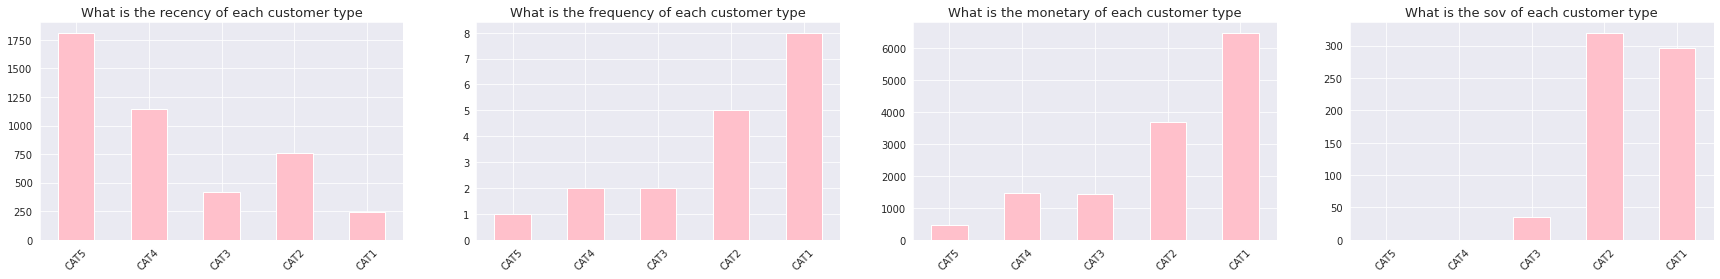

In [ ]:
column = ['recency','frequency','monetary',"sov"]
plt.figure(figsize=(30,4))
for i,j in enumerate(column):
    plt.subplot(1,4,i+1)
    rfm_audi.groupby('customer_type')[j].mean().round(0).plot(kind='bar', color='pink')
    plt.title('What is the {} of each customer type'.format(j), size=13)
    plt.xlabel('')
    plt.xticks(rotation=45)

plt.show()

## K-MEANS CLUSTERING

In [ ]:
# copying the data into new variable
df_kmeans = rfm_audi.copy()
# taking only relevant columns
df_kmeans = df_kmeans.iloc[:,:4]
df_kmeans.head()

,Bastidor,recency,frequency,monetary
0,WAUZZZ4L97D07664,629,5,1233.45
1,WAUZZZ8E55A50910,1676,1,1144.53
2,WAUZZZ8P07A02124,385,2,757.33
3,WAUZZZ8P1CA04845,2275,1,208.16
4,WAUZZZ8T4EA06800,836,6,10582.17


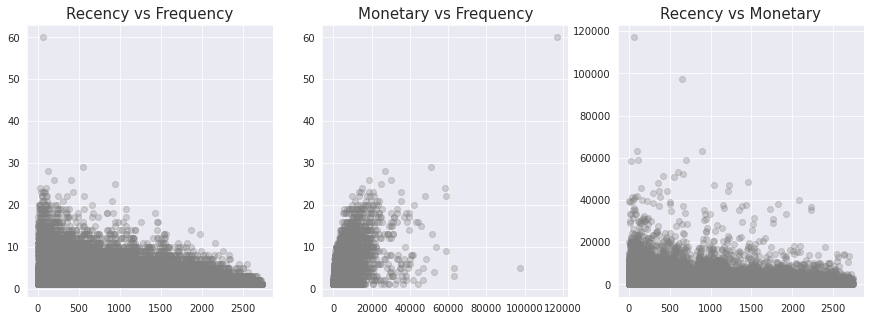

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1) # UNA FILA, TRES GRAFICOS POR FILA, Y LO HACEMOS EN LA PRIMERA. 
plt.scatter(df_kmeans.recency, df_kmeans.frequency, color='grey', alpha=0.3) # en este primero metemos el kmeans de recency y frecuenciy 
plt.title('Recency vs Frequency', size=15)
plt.subplot(1,3,2)
plt.scatter(df_kmeans.monetary, df_kmeans.frequency, color='grey', alpha=0.3) # en este segundo metemos monetary y frecuency
plt.title('Monetary vs Frequency', size=15)
plt.subplot(1,3,3)
plt.scatter(df_kmeans.recency, df_kmeans.monetary, color='grey', alpha=0.3) # en el tercero recency vs monetary
plt.title('Recency vs Monetary', size=15)
plt.show()

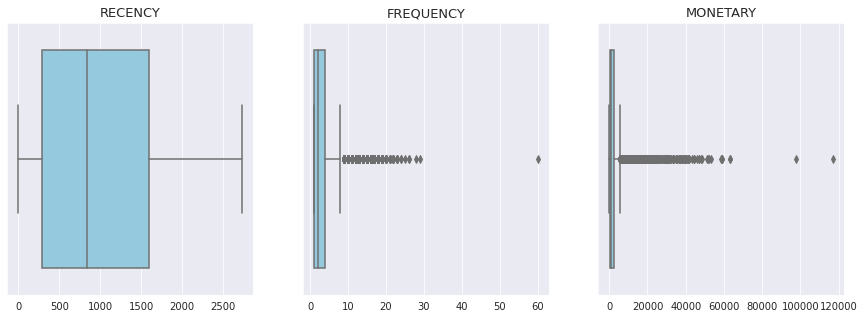

In [ ]:
# checking the distribution of the variables

column = ['recency','frequency','monetary']
plt.figure(figsize=(15,5))
for i,j in enumerate(column):
    plt.subplot(1,3,i+1)
    sns.boxplot(df_kmeans[j], color='skyblue')
    plt.xlabel('')
    plt.title('{}'.format(j.upper()), size=13)
plt.show()

In [ ]:
# Removing outliers for Monetary
Q1 = df_kmeans.monetary.quantile(0.05)
Q3 = df_kmeans.monetary.quantile(0.95)
IQR = Q3 - Q1
df_kmeans = df_kmeans[(df_kmeans.monetary >= Q1 - 1.5*IQR) & (df_kmeans.monetary <= Q3 + 1.5*IQR)]

# Removing outliers for Recency
Q1 = df_kmeans.recency.quantile(0.05)
Q3 = df_kmeans.recency.quantile(0.95)
IQR = Q3 - Q1
df_kmeans = df_kmeans[(df_kmeans.recency >= Q1 - 1.5*IQR) & (df_kmeans.recency <= Q3 + 1.5*IQR)]

# Removing outliers for Frequency
Q1 = df_kmeans.frequency.quantile(0.05)
Q3 = df_kmeans.frequency.quantile(0.95)
IQR = Q3 - Q1
df_kmeans = df_kmeans[(df_kmeans.frequency >= Q1 - 1.5*IQR) & (df_kmeans.frequency <= Q3 + 1.5*IQR)]

In [ ]:
# resetting the index
df_kmeans = df_kmeans.reset_index(drop=True)
df_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28369 entries, 0 to 28368
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bastidor   28369 non-null  object 
 1   recency    28369 non-null  int64  
 2   frequency  28369 non-null  int64  
 3   monetary   28369 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 886.7+ KB


In [ ]:
# looking at random 5 rows
df_kmeans.sample(5)

,Bastidor,recency,frequency,monetary
19207,WAUZZZ8V7EA044237,359,2,1306.63
21461,WAUZZZ8X7DB015170,575,4,617.78
2142,WAUZZZ4F88N057364,871,1,514.60
24121,WAUZZZF46HA026231,476,3,894.49
1257,WAUZZZ4F16N182106,743,1,528.29


In [ ]:
# removing customer id as it will not used in making cluster
df_kmeans = df_kmeans.iloc[:,1:]

# scaling the variables and store it in different df
standard_scaler = StandardScaler()
df_kmeans_norm = standard_scaler.fit_transform(df_kmeans)

# converting it into dataframe
df_kmeans_norm = pd.DataFrame(df_kmeans_norm)
df_kmeans_norm.columns = ['recency','frequency','monetary']
df_kmeans_norm.head()

,recency,frequency,monetary
0,-0.456138,0.721018,-0.277911
1,0.876494,-0.761706,-0.312183
2,-0.766704,-0.391025,-0.461417
3,1.638907,-0.761706,-0.673077
4,-0.192666,1.091699,3.325253


- inicialmente sin ningún conocimiento estamos clusterizando los datos en 5 clusters. La unica intuición que tenemos es RFM, con lo cual categorizamos en 5.
- mas tarde veremos más metodos para optimizar el valor de K

In [ ]:
# Kmeans with K=5

model_clus5 = KMeans(n_clusters = 5)
model_clus5.fit(df_kmeans_norm)

KMeans(n_clusters=5)

In [ ]:
# checking the labels
model_clus5.labels_

array([4, 2, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
df_kmeans['clusters'] = model_clus5.labels_
df_kmeans.head()

,recency,frequency,monetary,clusters
0,629,5,1233.45,4
1,1676,1,1144.53,2
2,385,2,757.33,1
3,2275,1,208.16,2
4,836,6,10582.17,3


In [ ]:
df_kmeans.groupby('clusters').mean().round(0)

,recency,frequency,monetary
clusters,,,
0,451.0,8.0,5328.0
1,540.0,2.0,704.0
2,1986.0,2.0,946.0
3,517.0,9.0,11849.0
4,576.0,5.0,2785.0


- METODO DEL CODO

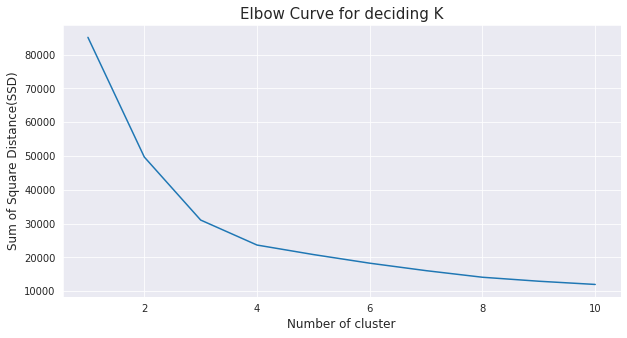

In [ ]:
# Elbow-curve/SSD

ssd = []
for num_clusters in list(range(1,11)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_kmeans_norm)
    ssd.append(model_clus.inertia_)
    
# plot the SSDs for each n_clusters
plt.figure(figsize=(10,5))
plt.plot(np.arange(1,11,1), ssd)
plt.xlabel('Number of cluster', size=12)
plt.ylabel('Sum of Square Distance(SSD)', size=12)
plt.title('Elbow Curve for deciding K', size=15)
plt.show()

In [ ]:
# Silhouette analysis

for num_clusters in list(range(2,11)):
    # intialise kmeans
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_kmeans_norm)
    
    cluster_labels = model_clus.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_kmeans_norm, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4799458176017267
For n_clusters=3, the silhouette score is 0.4335322409747515
For n_clusters=4, the silhouette score is 0.43144589006182477
For n_clusters=5, the silhouette score is 0.40597717234101777
For n_clusters=6, the silhouette score is 0.34415295588608846
For n_clusters=7, the silhouette score is 0.3505249415577336
For n_clusters=8, the silhouette score is 0.36471981128890735
For n_clusters=9, the silhouette score is 0.353655060942245
For n_clusters=10, the silhouette score is 0.3297146020509937


In [ ]:
# Kmeans with K=3
model_clus3 = KMeans(n_clusters = 3)
model_clus3.fit(df_kmeans_norm)

KMeans(n_clusters=3)

In [ ]:
df_kmeans['clusters'] = model_clus3.labels_
df_kmeans.head()

,recency,frequency,monetary,clusters
0,629,5,1233.45,0
1,1676,1,1144.53,1
2,385,2,757.33,0
3,2275,1,208.16,1
4,836,6,10582.17,2


In [ ]:
df_kmeans.groupby('clusters').mean().round(0)

,recency,frequency,monetary
clusters,,,
0,515.0,2.0,1183.0
1,1949.0,2.0,1000.0
2,499.0,8.0,6468.0


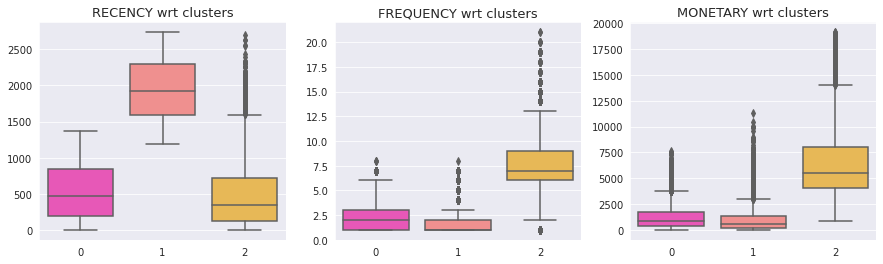

In [ ]:
column = ['recency','frequency','monetary']
plt.figure(figsize=(15,4))
for i,j in enumerate(column):
    plt.subplot(1,3,i+1)
    sns.boxplot(y=df_kmeans[j], x=df_kmeans['clusters'], palette='spring')
    plt.title('{} wrt clusters'.format(j.upper()), size=13)
    plt.ylabel('')
    plt.xlabel('')

plt.show()

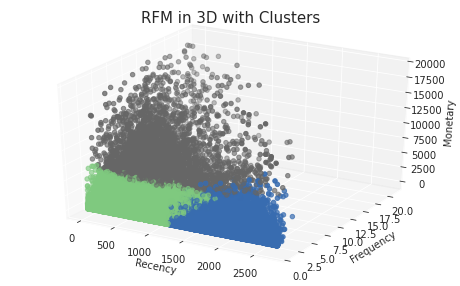

In [ ]:
# Creating figure
fig = plt.figure(figsize = (8, 5))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(df_kmeans.recency, df_kmeans.frequency, df_kmeans.monetary, c=df_kmeans.clusters, cmap='Accent')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('RFM in 3D with Clusters', size=15)
ax.set(facecolor='white')
plt.show()